# MODELLING STEP 1

In this jupyter notebook the deployment of STEP 1 for the model of wildfires prediction is documented. 

In [5]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import julian
import datetime

import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import re

import h3
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [21]:
df_fires=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wildfires_CA.csv")
df_fires.drop(["Unnamed: 0"],axis=1, inplace=True)

In [22]:
df_fires["STATE"].unique()

array(['CA'], dtype=object)

In [23]:
#only california
df_fires.drop(["STATE"],axis=1, inplace=True)

In [24]:
df_fires.shape

(189550, 38)

# Target variable 2: FIRE_SIZE_CLASS

In [25]:
size_classes=sorted(list(df_fires["FIRE_SIZE_CLASS"].unique()))
size_classes

['A', 'B', 'C', 'D', 'E', 'F', 'G']

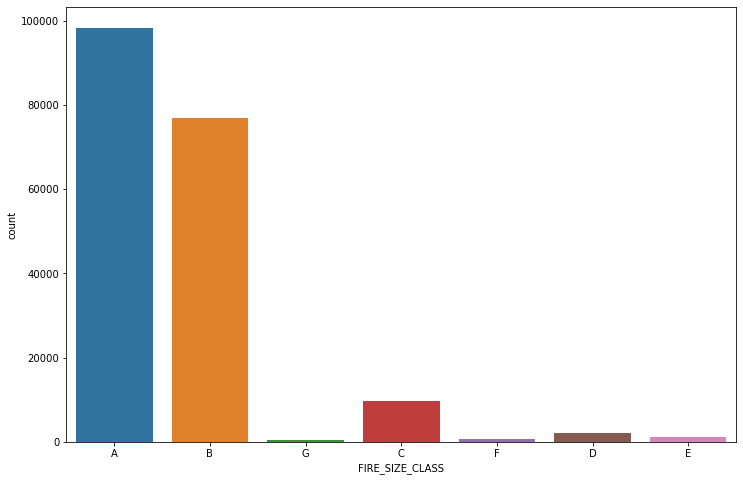

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x="FIRE_SIZE_CLASS", data=df_fires)
plt.show()

------ FIRE SIZE CLASS:  A  ------


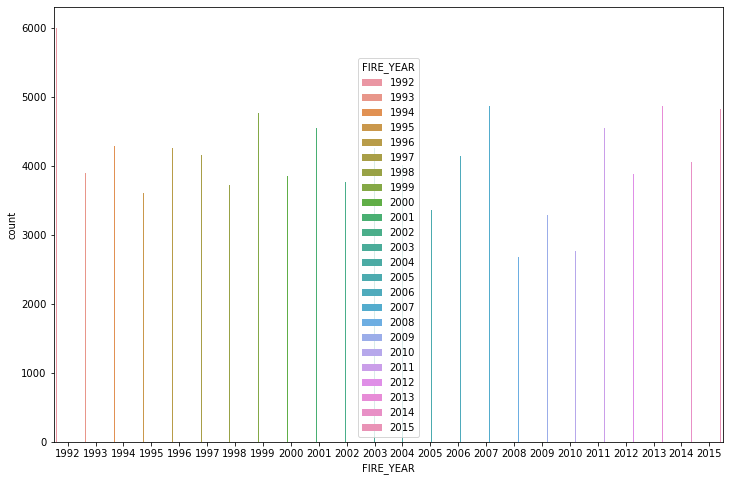

------ FIRE SIZE CLASS:  B  ------


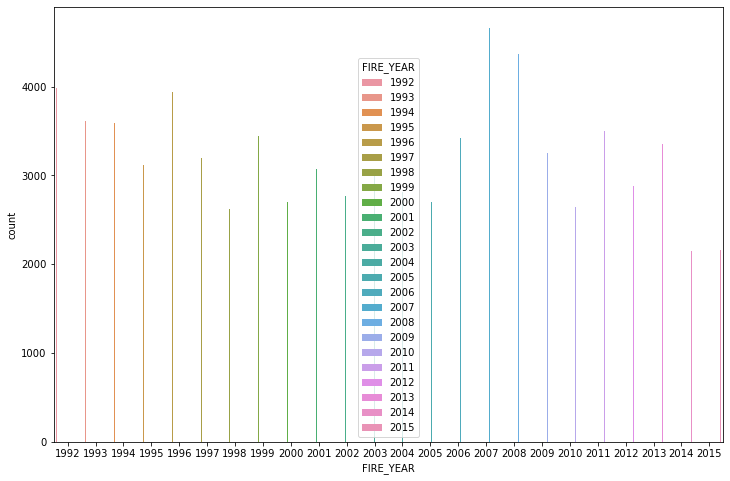

------ FIRE SIZE CLASS:  C  ------


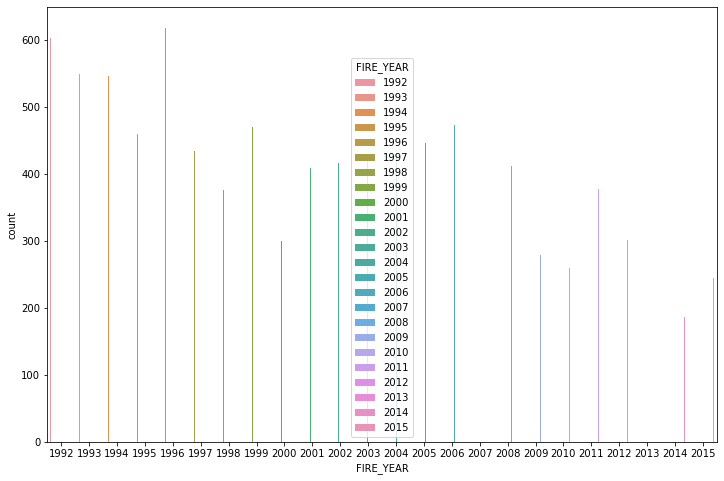

------ FIRE SIZE CLASS:  D  ------


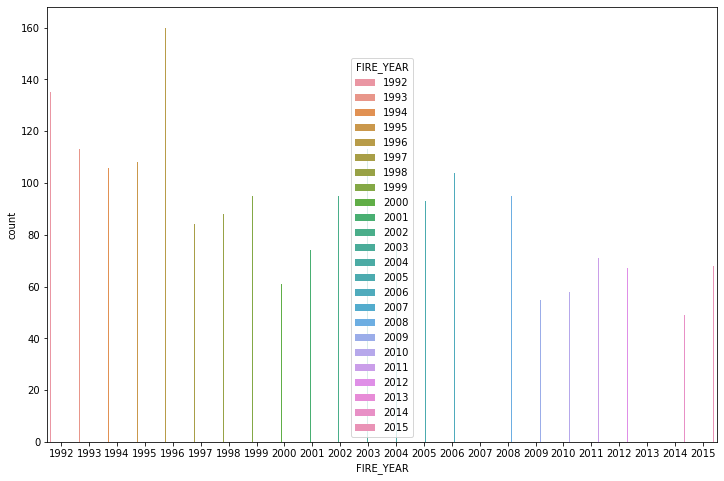

------ FIRE SIZE CLASS:  E  ------


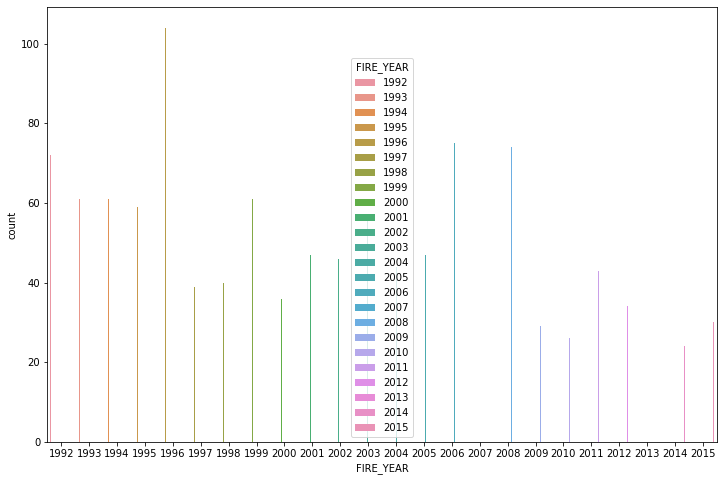

------ FIRE SIZE CLASS:  F  ------


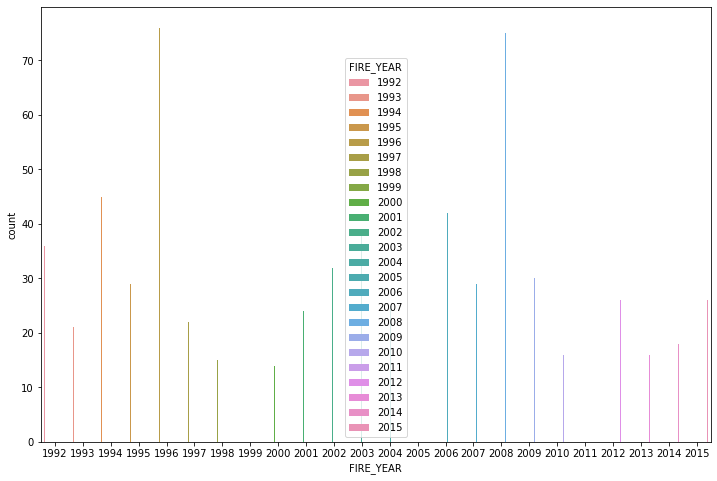

------ FIRE SIZE CLASS:  G  ------


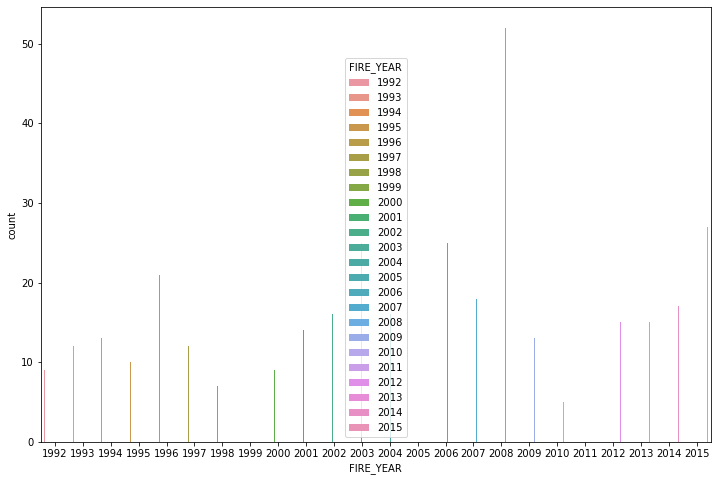

In [27]:
for size_class in size_classes:
    print("------ FIRE SIZE CLASS: ",size_class," ------")
    plt.figure(figsize=(12,8))
    sns.countplot(x="FIRE_YEAR", hue="FIRE_YEAR", data=df_fires[df_fires["FIRE_SIZE_CLASS"]==size_class])
    plt.show()

In [1110]:
fire_size_dic={'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': 4, 'F':4 , 'G': 4}

In [1111]:
df_fires["FIRE_SIZE_CLASS"] = df_fires["FIRE_SIZE_CLASS"].replace(fire_size_dic)

------ FIRE SIZE CLASS:  1  ------


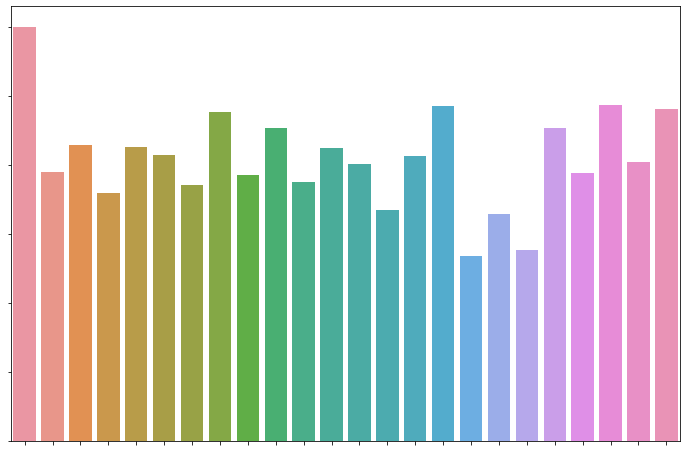

------ FIRE SIZE CLASS:  2  ------


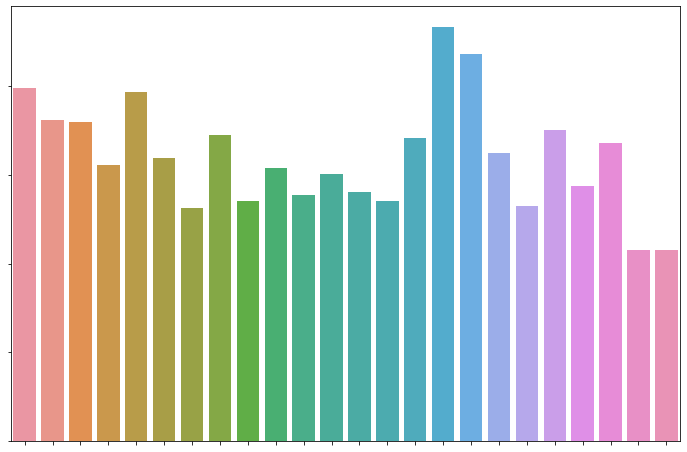

------ FIRE SIZE CLASS:  3  ------


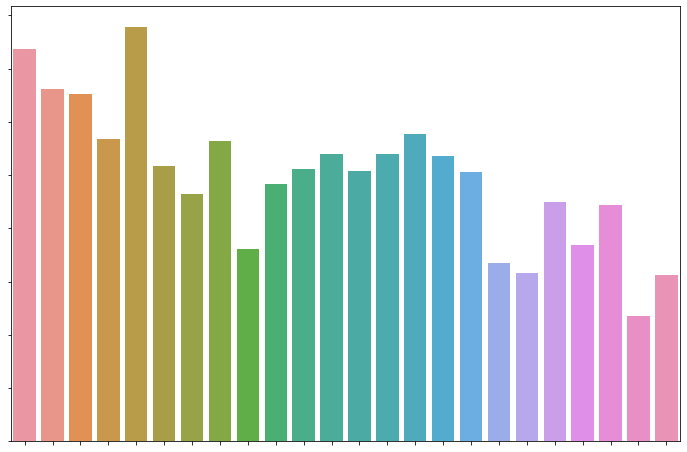

------ FIRE SIZE CLASS:  4  ------


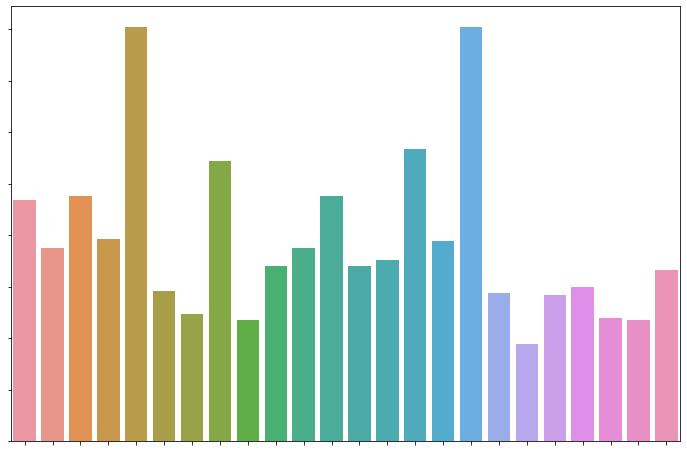

In [1113]:
size_classes=sorted(list(df_fires["FIRE_SIZE_CLASS"].unique()))
size_classes

for size_class in size_classes:
    print("------ FIRE SIZE CLASS: ",size_class," ------")
    plt.figure(figsize=(12,8))
    sns.countplot(x="FIRE_YEAR", data=df_fires[df_fires["FIRE_SIZE_CLASS"]==size_class])
    plt.show()

# 1. Data Exploration

In [1114]:
#df_fires.info()

In [1115]:
#df_fires.isna().sum()

# 1.2. Data Exploration: NaN-values

In [1116]:
percent_missing = df_fires.isna().sum() * 100 / len(df_fires)
missing_value_df = pd.DataFrame({'column_name': df_fires.columns,
                                 'percent_missing': percent_missing})

In [1117]:
missing_value_df[missing_value_df["percent_missing"]>20.0]

,column_name,percent_missing
LOCAL_FIRE_REPORT_ID,LOCAL_FIRE_REPORT_ID,67.326299
LOCAL_INCIDENT_ID,LOCAL_INCIDENT_ID,32.480612
FIRE_CODE,FIRE_CODE,70.708520
ICS_209_INCIDENT_NUMBER,ICS_209_INCIDENT_NUMBER,98.502770
ICS_209_NAME,ICS_209_NAME,98.502770
MTBS_ID,MTBS_ID,99.400158
MTBS_FIRE_NAME,MTBS_FIRE_NAME,99.400158
COMPLEX_NAME,COMPLEX_NAME,99.510947
DISCOVERY_TIME,DISCOVERY_TIME,41.853337
CONT_DATE,CONT_DATE,51.512530


In [1118]:
drop_columns=missing_value_df[missing_value_df["percent_missing"]>20.0].index.to_list()
len(drop_columns)

15

In [1119]:
print("Dropping columns with % of NaN-values > 20.0")
print()
print("DF shape before: ",df_fires.shape)
df_fires.drop(drop_columns, axis=1, inplace=True)
print("DF shape after: ",df_fires.shape)


Dropping columns with % of NaN-values > 20.0

DF shape before:  (189550, 38)
DF shape after:  (189550, 23)


# 1.2. Data Exploration: unique values

In [1120]:
#df_fires.nunique()

In [1121]:
n_unique=df_fires.nunique()
percent_unique = df_fires.nunique() * 100 / len(df_fires)

unique_value_df = pd.DataFrame({'column_name': df_fires.columns,
                                'n_unique':n_unique,
                                 'percent_uniques': percent_unique})

In [1122]:
unique_value_df.sort_values(by=['n_unique'],ascending=False)

,column_name,n_unique,percent_uniques
OBJECTID,OBJECTID,189550,100.000000
FOD_ID,FOD_ID,189550,100.000000
FPA_ID,FPA_ID,189549,99.999472
Shape,Shape,136573,72.051174
FIRE_NAME,FIRE_NAME,78146,41.227117
LATITUDE,LATITUDE,69703,36.772883
LONGITUDE,LONGITUDE,69094,36.451596
DISCOVERY_DATE,DISCOVERY_DATE,8324,4.391453
FIRE_SIZE,FIRE_SIZE,2248,1.185967
DISCOVERY_DOY,DISCOVERY_DOY,366,0.193089


- OBJECTID as index
- FOD_ID, FPA_ID to drop (foreign keys in SQDatabase)

- Fire name in Yes/No

- FIRE_SIZE & FIRE_SIZE_CLASS probably highly correlated 

In [1123]:
df_fires.set_index(["OBJECTID"],inplace=True)

In [1124]:
drop_columns=["FOD_ID","FPA_ID","Shape"]

In [1125]:
print("Dropping columns by unquie values:")
print()
print("DF shape before: ",df_fires.shape)
df_fires.drop(drop_columns, axis=1, inplace=True)
print("DF shape after: ",df_fires.shape)

Dropping columns by unquie values:

DF shape before:  (189550, 22)
DF shape after:  (189550, 19)


# 1.3. Data Exploration: Data types

In [1126]:
def lat_lng_to_h4(row):
    return h3.geo_to_h3(row['LATITUDE'], row['LONGITUDE'], 4)

def lat_lng_to_h5(row):
    return h3.geo_to_h3(row['LATITUDE'], row['LONGITUDE'], 5)

def lat_lng_to_h3(row):
    return h3.geo_to_h3(row['LATITUDE'], row['LONGITUDE'], 3)

In [1127]:
df_fires["h3_level_4"]=df_fires.apply(lat_lng_to_h4, axis=1)

In [1128]:
df_fires["h3_level_5"]=df_fires.apply(lat_lng_to_h5, axis=1)

In [1129]:
df_fires["h3_level_3"]=df_fires.apply(lat_lng_to_h3, axis=1)

In [1130]:
#df_fires.info()

In [1131]:
#df[i] = pd.to_numeric(df[i],errors="coerce")
    
numericals=df_fires.select_dtypes(np.number)
print(len(numericals.columns))
numericals.columns

9


Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE'],
      dtype='object')

In [1132]:
categoricals=df_fires.select_dtypes("object")
print(len(categoricals.columns))
categoricals.columns

13


Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
       'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'FIRE_NAME',
       'STAT_CAUSE_DESCR', 'OWNER_DESCR', 'h3_level_4', 'h3_level_5',
       'h3_level_3'],
      dtype='object')

In [1133]:
df_fires.drop(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
       'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'FIRE_NAME', 'OWNER_DESCR'],axis=1, inplace=True)

# 1.4 Data Exploration: Timestamps

Adding gregorian dates for 'DISCOVERY_DATE', 

In [1134]:
#!pip install julian

In [1135]:
df_fires['DISC_DATE'] = pd.to_datetime(df_fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


df_fires.drop(['DISCOVERY_DATE'],axis=1, inplace=True)

In [1136]:
#df_fires['DISC_DATE'] = pd.to_datetime(df_fires['DISCOVERY_DATE'])
df_fires['DISC_MONTH'] = df_fires['DISC_DATE'].apply(lambda x: x.strftime("%m"))

In [1137]:
df_fires

,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,h3_level_4,h3_level_5,h3_level_3,DISC_DATE,DISC_MONTH
OBJECTID,,,,,,,,,,,,,,
1,2005,33,9.0,Miscellaneous,0.10,1,40.036944,-121.005833,5.0,8428141ffffffff,8528140ffffffff,832814fffffffff,2005-02-02,02
2,2004,133,1.0,Lightning,0.25,1,38.933056,-120.404444,5.0,8428325ffffffff,85283243fffffff,832832fffffffff,2004-05-12,05
3,2004,152,5.0,Debris Burning,0.10,1,38.984167,-120.735556,13.0,8428325ffffffff,85283247fffffff,832832fffffffff,2004-05-31,05
4,2004,180,1.0,Lightning,0.10,1,38.559167,-119.913333,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
5,2004,180,1.0,Lightning,0.10,1,38.559167,-119.933056,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880461,2015,269,13.0,Missing/Undefined,0.01,1,40.481637,-122.389375,13.0,8428151ffffffff,8528150ffffffff,832815fffffffff,2015-09-26,09
1880462,2015,278,9.0,Miscellaneous,0.20,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-10-05,10
1880463,2015,122,13.0,Missing/Undefined,0.10,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-05-02,05


In [1138]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189550 entries, 1 to 1880465
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FIRE_YEAR         189550 non-null  int64         
 1   DISCOVERY_DOY     189550 non-null  int64         
 2   STAT_CAUSE_CODE   189550 non-null  float64       
 3   STAT_CAUSE_DESCR  189550 non-null  object        
 4   FIRE_SIZE         189550 non-null  float64       
 5   FIRE_SIZE_CLASS   189550 non-null  int64         
 6   LATITUDE          189550 non-null  float64       
 7   LONGITUDE         189550 non-null  float64       
 8   OWNER_CODE        189550 non-null  float64       
 9   h3_level_4        189550 non-null  object        
 10  h3_level_5        189550 non-null  object        
 11  h3_level_3        189550 non-null  object        
 12  DISC_DATE         189550 non-null  datetime64[ns]
 13  DISC_MONTH        189550 non-null  object        
dtypes: 

# 1.5 Data Exploration: Plots

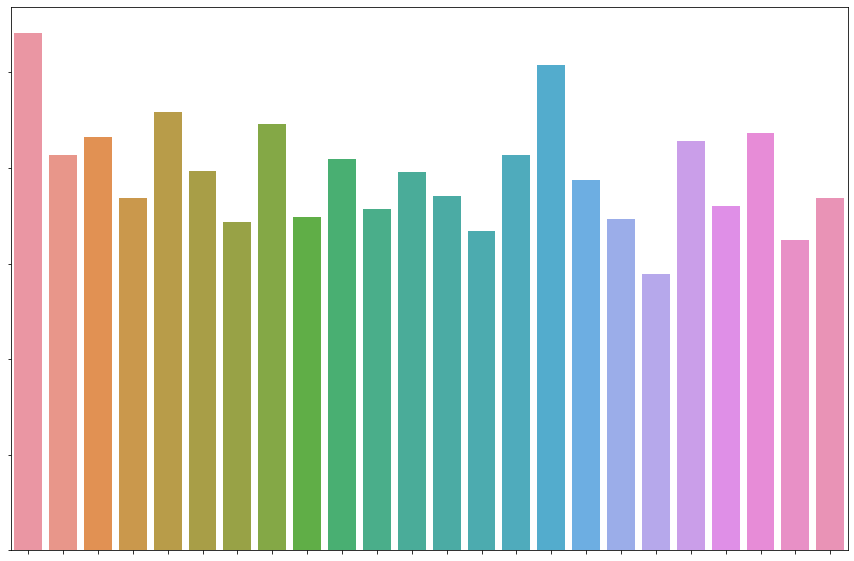

In [1139]:
plt.figure(figsize=(15,10))
sns.countplot(x="FIRE_YEAR", data=df_fires)
plt.show()

In [1140]:
size_classes=sorted(list(df_fires["FIRE_SIZE_CLASS"].unique()))
size_classes

[1, 2, 3, 4]

------ FIRE SIZE CLASS:  1  ------


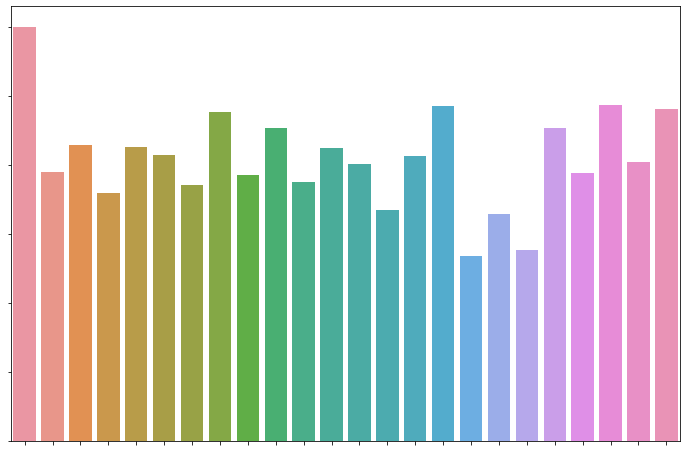

------ FIRE SIZE CLASS:  2  ------


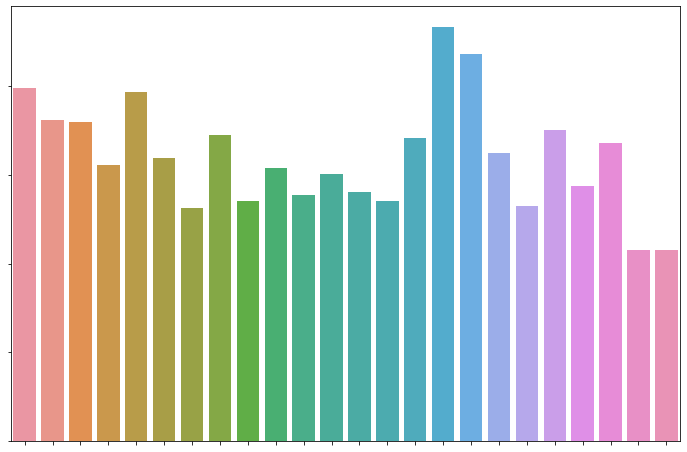

------ FIRE SIZE CLASS:  3  ------


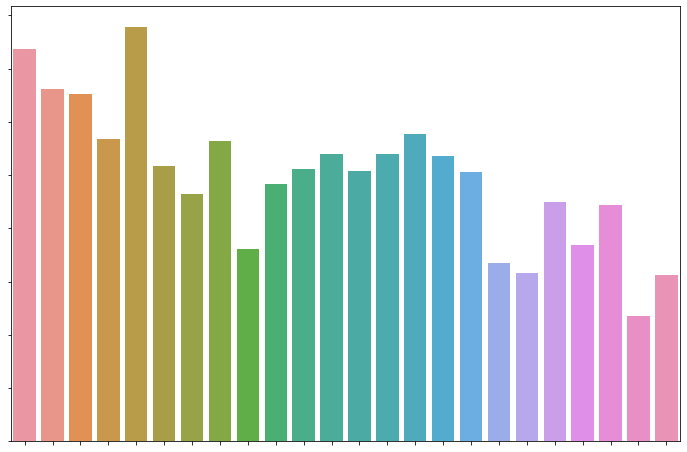

------ FIRE SIZE CLASS:  4  ------


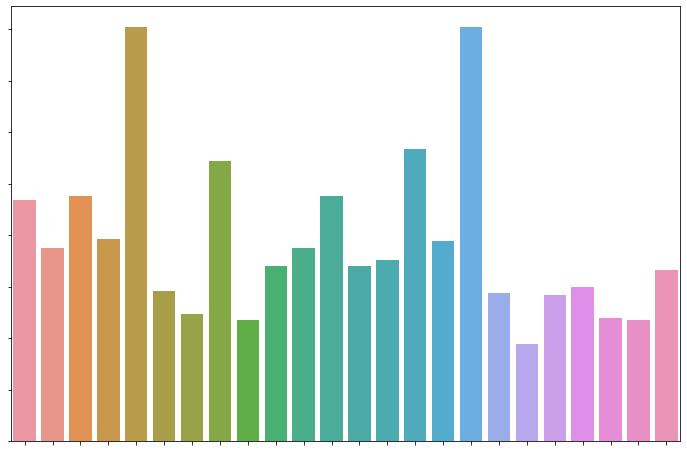

In [1141]:
for size_class in size_classes:
    print("------ FIRE SIZE CLASS: ",size_class," ------")
    plt.figure(figsize=(12,8))
    sns.countplot(x="FIRE_YEAR", data=df_fires[df_fires["FIRE_SIZE_CLASS"]==size_class])
    plt.show()

In [1142]:
causes=list(df_fires["STAT_CAUSE_DESCR"].unique())

------ FIRE SIZE CLASS:  1  ------


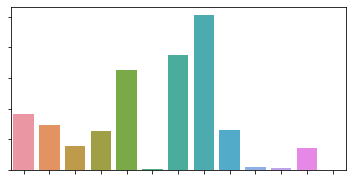

------ FIRE SIZE CLASS:  2  ------


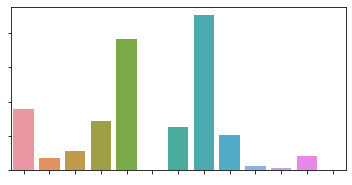

------ FIRE SIZE CLASS:  3  ------


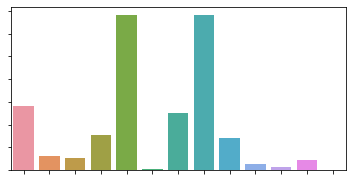

------ FIRE SIZE CLASS:  4  ------


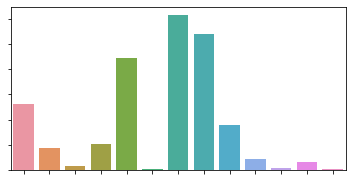

In [1143]:
for size_class in size_classes:
    print("------ FIRE SIZE CLASS: ",size_class," ------")
    plt.figure(figsize=(6,3))
    chart=sns.countplot(x="STAT_CAUSE_DESCR", order=sorted(causes),data=df_fires[df_fires["FIRE_SIZE_CLASS"]==size_class])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show() 

In [1144]:
fire_cause_dict={}

for index, row in df_fires.iterrows():
    key = int(row['STAT_CAUSE_CODE'])
    #print(key)
    if key in fire_cause_dict:
        continue
    else:
        fire_cause_dict[key] = row["STAT_CAUSE_DESCR"]

In [1145]:
fire_cause_dict

{9: 'Miscellaneous',
 1: 'Lightning',
 5: 'Debris Burning',
 4: 'Campfire',
 2: 'Equipment Use',
 8: 'Children',
 7: 'Arson',
 3: 'Smoking',
 6: 'Railroad',
 10: 'Fireworks',
 12: 'Structure',
 11: 'Powerline',
 13: 'Missing/Undefined'}

In [1146]:
years=sorted(list(df_fires["FIRE_YEAR"].unique()))

------ FIRE CAUSE: ------


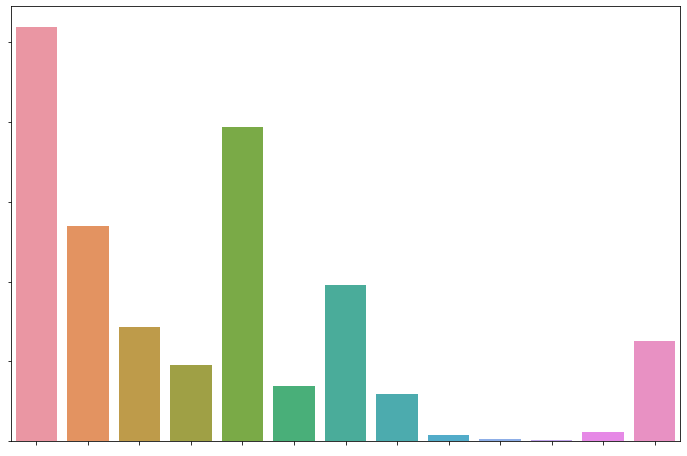

In [1147]:
print("------ FIRE CAUSE: ------")
plt.figure(figsize=(12,8))
chart=sns.countplot(x="STAT_CAUSE_DESCR", data=df_fires)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# 2. Checking independency of features

# 2.1. Correlation of numericals

In [1148]:
numericals=df_fires.select_dtypes(np.number)
print(len(numericals.columns))
numericals.columns

8


Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE'],
      dtype='object')

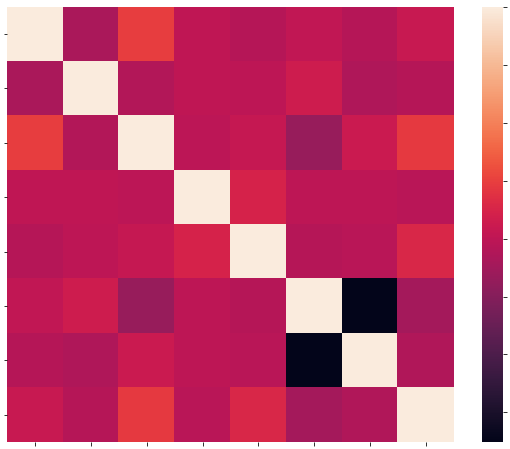

In [1149]:
def corr_matrix(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    corr_matrix=df.corr(method='pearson')  # default
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()
    
corr_matrix(numericals)

# 3. Adding weather data to database

In [1150]:
df_stations=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/CA_weather_stations_clustered_4.csv")
df_stations.drop(["Unnamed: 0"],axis=1, inplace=True)


In [1151]:
hexagon_station_dict={}

for row in range(len(df_stations['station_id'])):
    key = df_stations['station_id'][row]
    hexagon_station_dict[key]= df_stations["h3_level_4"][row]
    
len(hexagon_station_dict.keys())

4427

In [1152]:
hexagon_station_dict2={}

for row in range(len(df_stations['station_id'])):
    key = df_stations['station_id'][row]
    hexagon_station_dict2[key]= df_stations["h3_level_3"][row]
    
len(hexagon_station_dict2.keys())

4427

In [1153]:
df_stations

,station_id,latitude,longitude,datacoverage,mindate,maxdate,min_year,max_year,data_period,rad_lng,rad_lat,cluster,h3_level_4,h3_level_3
0,COOP:024299,32.88333,-114.46667,0.9996,1948-01-01,1949-08-01,1948,1949,1,-1.997820,0.573922,-1,84485b5ffffffff,83485bfffffffff
1,COOP:026250,34.15470,-114.29080,0.9755,1931-01-01,2015-11-01,1931,2015,84,-1.994751,0.596112,-1,8429b55ffffffff,8329b5fffffffff
2,COOP:029662,32.73333,-114.61667,0.9906,1948-01-01,1974-04-01,1948,1974,26,-2.000438,0.571304,0,84485bdffffffff,83485bfffffffff
3,COOP:040006,39.03333,-122.43333,0.8618,1960-08-01,1962-12-01,1960,1962,2,-2.136865,0.681260,1,8428339ffffffff,832833fffffffff
4,COOP:040010,38.21770,-121.20130,0.9469,1994-01-01,2015-11-01,1994,2015,21,-2.115362,0.667025,1,8428329ffffffff,832836fffffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,WBAN:93242,36.98778,-120.11056,1.0000,2005-01-01,2021-03-04,2005,2021,16,-2.096325,0.645559,7,8429abbffffffff,8329abfffffffff
4424,WBAN:93243,37.23810,-120.88250,1.0000,2004-03-25,2021-03-04,2004,2021,17,-2.109798,0.649927,1,8428369ffffffff,832836fffffffff
4425,WBAN:93244,34.60694,-120.07556,1.0000,2005-08-31,2021-03-04,2005,2021,16,-2.095714,0.604005,7,8429ac9ffffffff,8329acfffffffff
4426,WBAN:93245,38.32080,-123.07470,1.0000,2008-06-14,2021-03-04,2008,2021,13,-2.148059,0.668824,1,842831dffffffff,832831fffffffff


In [1154]:
df_temp1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_1992_2004.csv")
df_temp1.drop(["Unnamed: 0"],axis=1, inplace=True)

df_temp2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_2004_2016.csv")
df_temp2.drop(["Unnamed: 0"],axis=1, inplace=True)

df_temp3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_2016_2021.csv")
df_temp3.drop(["Unnamed: 0"],axis=1, inplace=True)

df_temp4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/temp_1975_1992.csv")
df_temp4.drop(["Unnamed: 0"],axis=1, inplace=True)

df_temp=pd.concat([df_temp1,df_temp2, df_temp3, df_temp4],ignore_index=True)
df_temp["h3_level_4"]=df_temp["station_id"].apply(lambda x: hexagon_station_dict[x])
df_temp=df_temp.groupby(["h3_level_4","date"]).mean()
df_temp.reset_index(inplace=True)

df_temp=df_temp[df_temp["date"]>"1991-12-01"]
df_temp

,h3_level_4,date,avgTemp
72,8428005ffffffff,1992-01-01,33.3050
73,8428005ffffffff,1992-03-01,33.5894
74,8428005ffffffff,1992-04-01,33.7496
75,8428005ffffffff,1992-05-01,34.8314
76,8428005ffffffff,1992-06-01,34.7162
...,...,...,...
102318,84485bbffffffff,2020-09-01,37.8266
102319,84485bbffffffff,2020-10-01,36.8444
102320,84485bbffffffff,2020-11-01,35.3828
102321,84485bbffffffff,2020-12-01,34.4120


In [1155]:
df_perc1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1992_1999-11.csv")
df_perc2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1999-12_2004.csv")
df_perc3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2004_2012-02.csv")
df_perc4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2012-03_2016.csv")
df_perc5=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_1975_1992.csv")
df_perc6=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/perc_2016_2021.csv")


df_perc1.drop(["Unnamed: 0"],axis=1, inplace=True)
df_perc2.drop(["Unnamed: 0"],axis=1, inplace=True)
df_perc3.drop(["Unnamed: 0"],axis=1, inplace=True)
df_perc4.drop(["Unnamed: 0"],axis=1, inplace=True)
df_perc5.drop(["Unnamed: 0"],axis=1, inplace=True)
df_perc6.drop(["Unnamed: 0"],axis=1, inplace=True)

df_perc=pd.concat([df_perc1,df_perc2,df_perc3,df_perc4,df_perc5,df_perc6],ignore_index=True)
df_perc["h3_level_4"]=df_perc["station_id"].apply(lambda x: hexagon_station_dict[x])
df_perc=df_perc.groupby(["h3_level_4","date"]).mean()
df_perc.reset_index(inplace=True)

df_perc

,h3_level_4,date,avgPerc
0,8428005ffffffff,1975-01-01,197.40
1,8428005ffffffff,1975-02-01,487.80
2,8428005ffffffff,1975-03-01,572.10
3,8428005ffffffff,1975-04-01,104.30
4,8428005ffffffff,1975-05-01,21.90
...,...,...,...
98125,84485bbffffffff,2020-09-01,0.00
98126,84485bbffffffff,2020-10-01,0.00
98127,84485bbffffffff,2020-11-01,0.00
98128,84485bbffffffff,2020-12-01,0.00


In [1156]:
df_wind1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_1992_2004.csv")
df_wind2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_2004_2016.csv")
df_wind3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_2016_2021.csv")
df_wind0=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wind_1985_1992.csv")


df_wind1.drop(["Unnamed: 0"],axis=1, inplace=True)
df_wind2.drop(["Unnamed: 0"],axis=1, inplace=True)
df_wind3.drop(["Unnamed: 0"],axis=1, inplace=True)
df_wind0.drop(["Unnamed: 0"],axis=1, inplace=True)

df_wind=pd.concat([df_wind0,df_wind1,df_wind2,df_wind3],ignore_index=True)
df_wind["h3_level_3"]=df_wind["station_id"].apply(lambda x: hexagon_station_dict2[x])
df_wind=df_wind.groupby(["h3_level_3","date"]).mean()
df_wind.reset_index(inplace=True)

df_wind


,h3_level_3,date,avgWind
0,832802fffffffff,1992-04-01,2.7
1,832802fffffffff,1992-05-01,2.8
2,832802fffffffff,1992-06-01,3.1
3,832802fffffffff,1992-07-01,2.9
4,832802fffffffff,1992-08-01,2.6
...,...,...,...
10542,83485bfffffffff,2020-09-01,2.2
10543,83485bfffffffff,2020-10-01,2.4
10544,83485bfffffffff,2020-11-01,2.4
10545,83485bfffffffff,2020-12-01,2.0


In [1157]:
df_evap1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_1992_2004.csv")
df_evap2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_2004_2016.csv")
df_evap0=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_1985_1992.csv")
df_evap3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/evap_2016_2021.csv")

df_evap1.drop(["Unnamed: 0"],axis=1, inplace=True)
df_evap2.drop(["Unnamed: 0"],axis=1, inplace=True)
df_evap0.drop(["Unnamed: 0"],axis=1, inplace=True)
df_evap3.drop(["Unnamed: 0"],axis=1, inplace=True)

df_evap=pd.concat([df_evap0,df_evap1,df_evap2,df_evap3],ignore_index=True)
df_evap["h3_level_3"]=df_evap["station_id"].apply(lambda x: hexagon_station_dict2[x])
df_evap=df_evap.groupby(["h3_level_3","date"]).mean()
df_evap.reset_index(inplace=True)

df_evap

,h3_level_3,date,avgEvap
0,832802fffffffff,1985-05-01,118.90
1,832802fffffffff,1985-06-01,166.10
2,832802fffffffff,1985-07-01,189.70
3,832802fffffffff,1985-09-01,68.20
4,832802fffffffff,1985-10-01,47.70
...,...,...,...
3329,8329acfffffffff,2020-08-01,236.60
3330,8329acfffffffff,2020-09-01,182.85
3331,8329acfffffffff,2020-10-01,181.00
3332,8329acfffffffff,2020-11-01,110.60


In [1158]:
def join2(row):
    return (row['h3_level_4']+str(row['FIRE_YEAR'])+"-"+str(row['DISC_MONTH'])+"-01")

# 3.1. Create df for every hegaxon & every month in 1992-2016

In [1159]:
df_fires

,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,h3_level_4,h3_level_5,h3_level_3,DISC_DATE,DISC_MONTH
OBJECTID,,,,,,,,,,,,,,
1,2005,33,9.0,Miscellaneous,0.10,1,40.036944,-121.005833,5.0,8428141ffffffff,8528140ffffffff,832814fffffffff,2005-02-02,02
2,2004,133,1.0,Lightning,0.25,1,38.933056,-120.404444,5.0,8428325ffffffff,85283243fffffff,832832fffffffff,2004-05-12,05
3,2004,152,5.0,Debris Burning,0.10,1,38.984167,-120.735556,13.0,8428325ffffffff,85283247fffffff,832832fffffffff,2004-05-31,05
4,2004,180,1.0,Lightning,0.10,1,38.559167,-119.913333,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
5,2004,180,1.0,Lightning,0.10,1,38.559167,-119.933056,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880461,2015,269,13.0,Missing/Undefined,0.01,1,40.481637,-122.389375,13.0,8428151ffffffff,8528150ffffffff,832815fffffffff,2015-09-26,09
1880462,2015,278,9.0,Miscellaneous,0.20,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-10-05,10
1880463,2015,122,13.0,Missing/Undefined,0.10,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-05-02,05


In [1160]:
index_fires=df_fires.index

In [1161]:
#Level 4

In [1162]:
def join1(row):
    return (row['h3_level_4']+row['date'])

In [1163]:
hexagons=list(df_fires["h3_level_4"].unique())
len(hexagons)

263

In [1164]:
dates=pd.date_range('1992-01-01','2016-01-01',freq='MS').strftime("%Y-%m-%d").tolist()
len(dates)

289

In [1165]:
df_model2=pd.DataFrame()
append=pd.DataFrame()

for hexagon in hexagons:
    append["date"]=[d for d in dates]
    append["h3_level_4"]=hexagon
    append["join"]=append.apply(join1,axis=1)
    
    
    df_model2=pd.concat([append,df_model2],axis=0)
    

In [1166]:
df_model2

,date,h3_level_4,join
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01
...,...,...,...
284,2015-09-01,8428141ffffffff,8428141ffffffff2015-09-01
285,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01
286,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01
287,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01


In [1167]:
df_model2[df_model2["join"]=="8428005ffffffff1992-01-01"]

,date,h3_level_4,join
0,1992-01-01,8428005ffffffff,8428005ffffffff1992-01-01


In [1168]:
#Level 3

In [1169]:
hexagons2=list(df_fires["h3_level_3"].unique())
len(hexagons2)

50

In [1170]:
l4_unique=list(df_model2["h3_level_4"].unique())

In [1174]:
df_fires.reset_index(inplace=True)

In [1175]:
hex_l3={}

for row in range(len(df_fires['h3_level_4'])):
    try:
        key = df_fires['h3_level_4'][row]
        hex_l3[key]= df_fires["h3_level_3"][row]
    except:
        continue
#hex_l3

In [1176]:
df_model2["h3_level_3"]=df_model2["h3_level_4"].apply(lambda x: hex_l3[x])

In [1177]:
df_model2

,date,h3_level_4,join,h3_level_3
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff
...,...,...,...,...
284,2015-09-01,8428141ffffffff,8428141ffffffff2015-09-01,832814fffffffff
285,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff
286,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff
287,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff


In [1178]:
def join1_3(row):
    return (row['h3_level_3']+row['date'])

In [1179]:
df_model2["join_l3"]=df_model2.apply(join1_3,axis=1)

In [1180]:
df_model2

,date,h3_level_4,join,h3_level_3,join_l3
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01
...,...,...,...,...,...
284,2015-09-01,8428141ffffffff,8428141ffffffff2015-09-01,832814fffffffff,832814fffffffff2015-09-01
285,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01
286,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01
287,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01


# 3.2.1 Join df_fires

In [1181]:
def join2(row):
    return (row['h3_level_4']+str(row['FIRE_YEAR'])+"-"+str(row['DISC_MONTH'])+"-01")

In [1182]:
def join2_3(row):
    return (row['h3_level_3']+str(row['FIRE_YEAR'])+"-"+str(row['DISC_MONTH'])+"-01")

In [1183]:
df_fires

,OBJECTID,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,h3_level_4,h3_level_5,h3_level_3,DISC_DATE,DISC_MONTH
0,1,2005,33,9.0,Miscellaneous,0.10,1,40.036944,-121.005833,5.0,8428141ffffffff,8528140ffffffff,832814fffffffff,2005-02-02,02
1,2,2004,133,1.0,Lightning,0.25,1,38.933056,-120.404444,5.0,8428325ffffffff,85283243fffffff,832832fffffffff,2004-05-12,05
2,3,2004,152,5.0,Debris Burning,0.10,1,38.984167,-120.735556,13.0,8428325ffffffff,85283247fffffff,832832fffffffff,2004-05-31,05
3,4,2004,180,1.0,Lightning,0.10,1,38.559167,-119.913333,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
4,5,2004,180,1.0,Lightning,0.10,1,38.559167,-119.933056,5.0,84298d3ffffffff,85298d3bfffffff,83298dfffffffff,2004-06-28,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189545,1880461,2015,269,13.0,Missing/Undefined,0.01,1,40.481637,-122.389375,13.0,8428151ffffffff,8528150ffffffff,832815fffffffff,2015-09-26,09
189546,1880462,2015,278,9.0,Miscellaneous,0.20,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-10-05,10
189547,1880463,2015,122,13.0,Missing/Undefined,0.10,1,37.617619,-120.938570,12.0,8428361ffffffff,85283613fffffff,832836fffffffff,2015-05-02,05
189548,1880464,2015,287,13.0,Missing/Undefined,2.00,2,37.672235,-120.898356,12.0,8428361ffffffff,85283603fffffff,832836fffffffff,2015-10-14,10


In [1184]:
df_fires.columns

Index(['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'h3_level_4', 'h3_level_5', 'h3_level_3',
       'DISC_DATE', 'DISC_MONTH'],
      dtype='object')

In [1186]:
#df_fires_rare=df_fires[['level_0', 'index', 'OBJECTID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DOY',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'h3_level_4',
       'h3_level_5', 'h3_level_3', 'DISC_DATE', 'DISC_MONTH']]

IndentationError: unexpected indent (<ipython-input-1186-5a167b619c21>, line 2)

In [1187]:
#df_fires_rare.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_fires_rare_model1.csv")

#print("Sucessfully saved")

In [1188]:
df_fires['join']=df_fires.apply(join2, axis=1)

In [1189]:
df_fires2=df_fires[["join","DISC_DATE","STAT_CAUSE_CODE","FIRE_SIZE_CLASS"]]



In [1190]:
df_fires2

,join,DISC_DATE,STAT_CAUSE_CODE,FIRE_SIZE_CLASS
0,8428141ffffffff2005-02-01,2005-02-02,9.0,1
1,8428325ffffffff2004-05-01,2004-05-12,1.0,1
2,8428325ffffffff2004-05-01,2004-05-31,5.0,1
3,84298d3ffffffff2004-06-01,2004-06-28,1.0,1
4,84298d3ffffffff2004-06-01,2004-06-28,1.0,1
...,...,...,...,...
189545,8428151ffffffff2015-09-01,2015-09-26,13.0,1
189546,8428361ffffffff2015-10-01,2015-10-05,9.0,1
189547,8428361ffffffff2015-05-01,2015-05-02,13.0,1
189548,8428361ffffffff2015-10-01,2015-10-14,13.0,2


In [1191]:
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,avgEvap
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0,NaN,NaN,NaN,NaN
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0,NaN,NaN,NaN,NaN
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0,NaN,NaN,NaN,NaN
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0,NaN,NaN,NaN,NaN
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,4.0,1.0,34.6088,44.125,NaN,NaN
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,9.0,1.0,34.6088,44.125,NaN,NaN
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0,32.6390,103.175,NaN,NaN
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,1,9.0,1.0,32.4074,240.900,NaN,NaN


In [1192]:
df_model_full=pd.merge(df_model2, df_fires2, how="left",on=["join"])
#df_model_full.drop(["join_l3_y"], axis=1, inplace=True)

In [1193]:
df_model_full.shape

(232134, 8)

In [1194]:
df_model_full.isna().sum()

date                   0
h3_level_4             0
join                   0
h3_level_3             0
join_l3                0
DISC_DATE          42584
STAT_CAUSE_CODE    42584
FIRE_SIZE_CLASS    42584
dtype: int64

In [1195]:
df_model_full.columns

Index(['date', 'h3_level_4', 'join', 'h3_level_3', 'join_l3', 'DISC_DATE',
       'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS'],
      dtype='object')

In [1196]:
columns={'date':'date', 'h3_level_4':'h3_level_4', 'join':'join', 'h3_level_3':'h3_level_3', 'join_l3':'join_l3', 'DISC_DATE':"fire_date","STAT_CAUSE_CODE":"cause_id",'FIRE_SIZE_CLASS':"fire_size"}
         

In [1197]:
df_model_full=df_model_full.rename(columns=columns)

In [1198]:
df_model_full["fire_date"]=df_model_full["fire_date"].fillna(0)

In [1199]:
df_model_full["cause_id"]=df_model_full["cause_id"].fillna(0)

In [1200]:
df_model_full["fire_size"]=df_model_full["fire_size"].fillna(0)

In [1201]:
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0
...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-31 00:00:00,4.0,1.0
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-12 00:00:00,9.0,1.0
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,2015-12-03 00:00:00,9.0,1.0


In [1202]:
df_model_full[df_model_full["join"]=="8428005ffffffff1992-01-01"]

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size
26423,1992-01-01,8428005ffffffff,8428005ffffffff1992-01-01,832800fffffffff,832800fffffffff1992-01-01,0,0.0,0.0


# 3.2.1. Join weather data

In [1203]:
def join1(row):
    return (row['h3_level_4']+row['date'])

In [1204]:
def join_3(row):
    return (row['h3_level_3']+row['date'])

In [1205]:
df_temp['join'] = df_temp.apply(join1, axis=1)
df_temp.drop(["h3_level_4","date"],axis=1,inplace=True)
df_temp

,avgTemp,join
72,33.3050,8428005ffffffff1992-01-01
73,33.5894,8428005ffffffff1992-03-01
74,33.7496,8428005ffffffff1992-04-01
75,34.8314,8428005ffffffff1992-05-01
76,34.7162,8428005ffffffff1992-06-01
...,...,...
102318,37.8266,84485bbffffffff2020-09-01
102319,36.8444,84485bbffffffff2020-10-01
102320,35.3828,84485bbffffffff2020-11-01
102321,34.4120,84485bbffffffff2020-12-01


In [1206]:
df_temp[df_temp["join"]=="8428005ffffffff1992-01-01"]

,avgTemp,join
72,33.305,8428005ffffffff1992-01-01


In [1207]:
df_perc['join'] = df_perc.apply(join1, axis=1)
df_perc.drop(["h3_level_4","date"],axis=1,inplace=True)
df_perc

,avgPerc,join
0,197.40,8428005ffffffff1975-01-01
1,487.80,8428005ffffffff1975-02-01
2,572.10,8428005ffffffff1975-03-01
3,104.30,8428005ffffffff1975-04-01
4,21.90,8428005ffffffff1975-05-01
...,...,...
98125,0.00,84485bbffffffff2020-09-01
98126,0.00,84485bbffffffff2020-10-01
98127,0.00,84485bbffffffff2020-11-01
98128,0.00,84485bbffffffff2020-12-01


In [1208]:
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0
...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-31 00:00:00,4.0,1.0
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-12 00:00:00,9.0,1.0
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,2015-12-03 00:00:00,9.0,1.0


In [1209]:
df_model_full=pd.merge(df_model_full, df_temp, how="left",on=["join"])
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size,avgTemp
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0,NaN
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0,NaN
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0,NaN
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0,NaN
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-31 00:00:00,4.0,1.0,34.6088
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-12 00:00:00,9.0,1.0,34.6088
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0,32.6390
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,2015-12-03 00:00:00,9.0,1.0,32.4074


In [1210]:
df_model_full=pd.merge(df_model_full, df_perc, how="left",on=["join"])
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size,avgTemp,avgPerc
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0,NaN,NaN
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0,NaN,NaN
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0,NaN,NaN
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0,NaN,NaN
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-31 00:00:00,4.0,1.0,34.6088,44.125
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,2015-10-12 00:00:00,9.0,1.0,34.6088,44.125
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0,32.6390,103.175
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,2015-12-03 00:00:00,9.0,1.0,32.4074,240.900


In [1211]:
df_model_full.isna().sum()

date              0
h3_level_4        0
join              0
h3_level_3        0
join_l3           0
fire_date         0
cause_id          0
fire_size         0
avgTemp       29195
avgPerc       42077
dtype: int64

In [1212]:
df_wind['join_l3'] = df_wind.apply(join_3, axis=1)
df_wind.drop(["h3_level_3","date"],axis=1,inplace=True)

In [1213]:
df_wind

,avgWind,join_l3
0,2.7,832802fffffffff1992-04-01
1,2.8,832802fffffffff1992-05-01
2,3.1,832802fffffffff1992-06-01
3,2.9,832802fffffffff1992-07-01
4,2.6,832802fffffffff1992-08-01
...,...,...
10542,2.2,83485bfffffffff2020-09-01
10543,2.4,83485bfffffffff2020-10-01
10544,2.4,83485bfffffffff2020-11-01
10545,2.0,83485bfffffffff2020-12-01


In [1214]:
df_evap['join_l3'] = df_evap.apply(join_3, axis=1)
df_evap.drop(["h3_level_3","date"],axis=1,inplace=True)

In [1215]:
df_evap

,avgEvap,join_l3
0,118.90,832802fffffffff1985-05-01
1,166.10,832802fffffffff1985-06-01
2,189.70,832802fffffffff1985-07-01
3,68.20,832802fffffffff1985-09-01
4,47.70,832802fffffffff1985-10-01
...,...,...
3329,236.60,8329acfffffffff2020-08-01
3330,182.85,8329acfffffffff2020-09-01
3331,181.00,8329acfffffffff2020-10-01
3332,110.60,8329acfffffffff2020-11-01


In [1216]:
df_model_full=pd.merge(df_model_full, df_wind, how="left",on=["join_l3"])
#df_model_full.drop(["join_y","join_2","date"], axis=1, inplace=True)

In [1217]:
df_model_full=pd.merge(df_model_full, df_evap, how="left",on=["join_l3"])
#df_model_full.drop(["join_y","join_2","date","join_l3_x"], axis=1, inplace=True)

In [1218]:
df_model_full.isna().sum()

date               0
h3_level_4         0
join               0
h3_level_3         0
join_l3            0
fire_date          0
cause_id           0
fire_size          0
avgTemp        29195
avgPerc        42077
avgWind        67520
avgEvap       173526
dtype: int64

In [1219]:
df_model_full["fire_date"]=df_model_full["fire_date"].apply(lambda x: 1 if x != 0 else x)

In [1220]:
df_model_full["fire_date"].value_counts()

1    189550
0     42584
Name: fire_date, dtype: int64

In [1221]:
df_model_full.isna().sum()

date               0
h3_level_4         0
join               0
h3_level_3         0
join_l3            0
fire_date          0
cause_id           0
fire_size          0
avgTemp        29195
avgPerc        42077
avgWind        67520
avgEvap       173526
dtype: int64

In [1222]:
percent_missing = df_model_full.isna().sum() * 100 / len(df_model_full)
missing_value_df = pd.DataFrame({'column_name': df_model_full.columns,
                                 'percent_missing': percent_missing})

In [1223]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
h3_level_4,h3_level_4,0.000000
join,join,0.000000
h3_level_3,h3_level_3,0.000000
join_l3,join_l3,0.000000
fire_date,fire_date,0.000000
cause_id,cause_id,0.000000
fire_size,fire_size,0.000000
avgTemp,avgTemp,12.576788
avgPerc,avgPerc,18.126169


# 3.3. Save df_model_full with index_fire for later match

In [1039]:
df_model_full

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,avgEvap
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0,NaN,NaN,NaN,NaN
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0,NaN,NaN,NaN,NaN
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0,NaN,NaN,NaN,NaN
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0,NaN,NaN,NaN,NaN
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
232129,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,4.0,1.0,34.6088,44.125,NaN,NaN
232130,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,9.0,1.0,34.6088,44.125,NaN,NaN
232131,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0,32.6390,103.175,NaN,NaN
232132,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,1,9.0,1.0,32.4074,240.900,NaN,NaN


In [1040]:
index=df_fires2.index
type(index)

pandas.core.indexes.range.RangeIndex

In [1041]:
index_df=pd.DataFrame(index,columns=["index_fires"])
index_df=pd.concat([index_df,df_fires2["join"]],axis=1)
index_df

,index_fires,join
0,0,8428141ffffffff2005-02-01
1,1,8428325ffffffff2004-05-01
2,2,8428325ffffffff2004-05-01
3,3,84298d3ffffffff2004-06-01
4,4,84298d3ffffffff2004-06-01
...,...,...
189545,189545,8428151ffffffff2015-09-01
189546,189546,8428361ffffffff2015-10-01
189547,189547,8428361ffffffff2015-05-01
189548,189548,8428361ffffffff2015-10-01


In [1042]:
df_model_full_to_save=pd.merge(df_model_full, index_df, how="left",on=["join"])

In [1043]:
df_model_full_to_save

,date,h3_level_4,join,h3_level_3,join_l3,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,avgEvap,index_fires
0,1992-01-01,842812dffffffff,842812dffffffff1992-01-01,832812fffffffff,832812fffffffff1992-01-01,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1992-02-01,842812dffffffff,842812dffffffff1992-02-01,832812fffffffff,832812fffffffff1992-02-01,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1992-03-01,842812dffffffff,842812dffffffff1992-03-01,832812fffffffff,832812fffffffff1992-03-01,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1992-04-01,842812dffffffff,842812dffffffff1992-04-01,832812fffffffff,832812fffffffff1992-04-01,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1992-05-01,842812dffffffff,842812dffffffff1992-05-01,832812fffffffff,832812fffffffff1992-05-01,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867407,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,9.0,1.0,34.6088,44.125,NaN,NaN,175237.0
2867408,2015-10-01,8428141ffffffff,8428141ffffffff2015-10-01,832814fffffffff,832814fffffffff2015-10-01,1,9.0,1.0,34.6088,44.125,NaN,NaN,176333.0
2867409,2015-11-01,8428141ffffffff,8428141ffffffff2015-11-01,832814fffffffff,832814fffffffff2015-11-01,0,0.0,0.0,32.6390,103.175,NaN,NaN,NaN
2867410,2015-12-01,8428141ffffffff,8428141ffffffff2015-12-01,832814fffffffff,832814fffffffff2015-12-01,1,9.0,1.0,32.4074,240.900,NaN,NaN,175236.0


In [1045]:
df_model_full_to_save.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_model_full_to_save.csv")

print("Sucessfully saved")

Sucessfully saved


# 4. Preparing df_model_full for modelling

In [1224]:
df_final=df_model_full_to_save

In [1226]:
#df_final.drop(["join","h3_level_3","join_l3","avgEvap"],axis=1,inplace=True)

In [1227]:
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,year
0,1992-01-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN,01,92
1,1992-02-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN,02,92
2,1992-03-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN,03,92
3,1992-04-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN,04,92
4,1992-05-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN,05,92
...,...,...,...,...,...,...,...,...,...,...,...
2867407,2015-10-01,8428141ffffffff,1,9.0,1.0,34.6088,44.125,NaN,175237.0,10,15
2867408,2015-10-01,8428141ffffffff,1,9.0,1.0,34.6088,44.125,NaN,176333.0,10,15
2867409,2015-11-01,8428141ffffffff,0,0.0,0.0,32.6390,103.175,NaN,NaN,11,15
2867410,2015-12-01,8428141ffffffff,1,9.0,1.0,32.4074,240.900,NaN,175236.0,12,15


In [1228]:
df_final_fire=df_final[df_final["fire_date"]==1]

In [1229]:
df_final_fire=df_final[df_final["fire_date"]==1]

percent_missing = df_final_fire.isna().sum() * 100 / len(df_final_fire)
missing_value_df = pd.DataFrame({'column_name': df_final_fire.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
date,date,0.000000
h3_level_4,h3_level_4,0.000000
fire_date,fire_date,0.000000
cause_id,cause_id,0.000000
fire_size,fire_size,0.000000
avgTemp,avgTemp,5.434632
avgPerc,avgPerc,8.807333
avgWind,avgWind,18.697280
index_fires,index_fires,0.000000
month,month,0.000000


In [1230]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
h3_level_4,h3_level_4,0.000000
fire_date,fire_date,0.000000
cause_id,cause_id,0.000000
fire_size,fire_size,0.000000
avgTemp,avgTemp,5.434632
avgPerc,avgPerc,8.807333
avgWind,avgWind,18.697280
index_fires,index_fires,0.000000
month,month,0.000000


In [1231]:
df_final.columns

Index(['date', 'h3_level_4', 'fire_date', 'cause_id', 'fire_size', 'avgTemp',
       'avgPerc', 'avgWind', 'index_fires', 'month', 'year'],
      dtype='object')

In [1232]:
df_final["fire_size"].unique()

array([0., 1., 2., 3., 4.])

In [1053]:
#df_final=df_final.rename(columns={'date_x':"date","h3_level_4_x":"h3_level_4",'fire_date':'fire_date','cause_id':'cause_id','avgPerc':'avgPerc','avgTemp_x':'avgTemp','avgWind':"avgWind"})              
              
df_final              
              

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires
0,1992-01-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN
1,1992-02-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN
2,1992-03-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN
3,1992-04-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN
4,1992-05-01,842812dffffffff,0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2867407,2015-10-01,8428141ffffffff,1,9.0,1.0,34.6088,44.125,NaN,175237.0
2867408,2015-10-01,8428141ffffffff,1,9.0,1.0,34.6088,44.125,NaN,176333.0
2867409,2015-11-01,8428141ffffffff,0,0.0,0.0,32.6390,103.175,NaN,NaN
2867410,2015-12-01,8428141ffffffff,1,9.0,1.0,32.4074,240.900,NaN,175236.0


In [1233]:
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['month'] = df_final['date'].apply(lambda x: x.strftime("%m"))
df_final['year'] = df_final['date'].apply(lambda x: x.strftime("%y"))

In [1055]:
#df_final.drop(["date"],axis=1,inplace=True)

In [1234]:
df_final = df_final[df_final['avgWind'].notna()]

In [1235]:
df_final = df_final[df_final['avgTemp'].notna()]

In [1236]:
df_final = df_final[df_final['avgPerc'].notna()]

In [1237]:
df_final.shape

(2108363, 11)

In [1238]:
percent_missing = df_final.isna().sum() * 100 / len(df_final)
missing_value_df = pd.DataFrame({'column_name': df_final.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
date,date,0.000000
h3_level_4,h3_level_4,0.000000
fire_date,fire_date,0.000000
cause_id,cause_id,0.000000
fire_size,fire_size,0.000000
avgTemp,avgTemp,0.000000
avgPerc,avgPerc,0.000000
avgWind,avgWind,0.000000
index_fires,index_fires,0.612845
month,month,0.000000


In [1239]:
df_final_fire=df_final[df_final["fire_date"]==1]

percent_missing = df_final_fire.isna().sum() * 100 / len(df_final_fire)
missing_value_df = pd.DataFrame({'column_name': df_final_fire.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
date,date,0.0
h3_level_4,h3_level_4,0.0
fire_date,fire_date,0.0
cause_id,cause_id,0.0
fire_size,fire_size,0.0
avgTemp,avgTemp,0.0
avgPerc,avgPerc,0.0
avgWind,avgWind,0.0
index_fires,index_fires,0.0
month,month,0.0


In [1240]:
df_final_fire.shape

(2095442, 11)

In [1241]:
df_final["fire_date"].value_counts()

1    2095442
0      12921
Name: fire_date, dtype: int64

In [1242]:
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,year
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,00
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,00
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,00
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,00
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,00
...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,15
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,15
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,15
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,15


In [1065]:
#df_final.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_final_level4_ex.csv")

print("Sucessfully saved")

Sucessfully saved


# 5.1. Feature Engineering: Including weather data from the past

In [1243]:
def join_quarter(row):
    return (row['h3_level_4']+str(row['quarter'])+str(row['year']))

In [1244]:
def avg_temp(df_temp,column_name):
    df_temp1=df_temp
    
    df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp["quarter"]=df_temp["date"].apply(lambda x: x.quarter)
    df_temp["year"]=df_temp["date"].apply(lambda x: x.year)
    df_temp['join']=df_temp.apply(join_quarter, axis=1)
    
    df_temp1['date'] = pd.to_datetime(df_temp1['date'])
    df_temp1["quarter"]=df_temp1["date"].apply(lambda x: x.quarter)
    df_temp1["year"]=df_temp1["date"].apply(lambda x: x.year)
    df_temp1=df_temp1.groupby(["h3_level_4","quarter","year"]).mean()
    df_temp1.reset_index(inplace=True)
    
    df_temp1['join']=df_temp1.apply(join_quarter, axis=1)
    
    quarter_dic={}
    
    for row in range(len(df_temp1['join'])):
        key = df_temp1['join'][row]
        quarter_dic[key]= df_temp1["avgTemp"][row]
        
    df_temp[column_name]=df_temp['join'].apply(lambda x: quarter_dic[x])
    df_temp.drop(["join","quarter","year"],axis=1, inplace=True)
    #df_temp['date'] = df_temp['date'].apply(lambda x: (str(x)[:11]))
    
    return df_temp

In [1245]:
df_final=avg_temp(df_final,"q_avg_temp")
#test["q_avg_temp"]=test["q_avg_temp"]
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,35.669000
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,35.669000
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,35.669000
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800
...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,35.714667
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450


In [1246]:
def join_year(row):
    return (row['h3_level_4']+str(row['year']))

In [1247]:
def avg_temp_year(df_temp,column_name):
    df_temp1=df_temp
    
    df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp["year"]=df_temp["date"].apply(lambda x: x.year)
    df_temp['join']=df_temp.apply(join_year, axis=1)
    
    df_temp1['date'] = pd.to_datetime(df_temp1['date'])
    df_temp1["year"]=df_temp1["date"].apply(lambda x: x.year)
    df_temp1=df_temp1.groupby(["h3_level_4","year"]).mean()
    df_temp1.reset_index(inplace=True)
    
    df_temp1['join']=df_temp1.apply(join_year, axis=1)
    
    quarter_dic={}
    
    for row in range(len(df_temp1['join'])):
        key = df_temp1['join'][row]
        quarter_dic[key]= df_temp1["avgTemp"][row]
        
    df_temp[column_name]=df_temp['join'].apply(lambda x: quarter_dic[x])
    df_temp.drop(["join","year"],axis=1, inplace=True)
    #df_temp['date'] = df_temp['date'].apply(lambda x: (str(x)[:11]))
    
    return df_temp

In [1248]:
df_final=avg_temp(df_final,"y_avg_temp")

In [1249]:
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,35.669000,35.669000
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,35.669000,35.669000
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,35.669000,35.669000
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800,34.581800
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800,34.581800
...,...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,35.714667,35.714667
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450,33.263450
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450,33.263450
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450,33.263450


In [1250]:
df_final.isna().sum()

date               0
h3_level_4         0
fire_date          0
cause_id           0
fire_size          0
avgTemp            0
avgPerc            0
avgWind            0
index_fires    12921
month              0
q_avg_temp         0
y_avg_temp         0
dtype: int64

In [1251]:
def avg_perc(df_temp,column_name):
    df_temp1=df_temp
    
    df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp["quarter"]=df_temp["date"].apply(lambda x: x.quarter)
    df_temp["year"]=df_temp["date"].apply(lambda x: x.year)
    df_temp['join']=df_temp.apply(join_quarter, axis=1)
    
    df_temp1['date'] = pd.to_datetime(df_temp1['date'])
    df_temp1["quarter"]=df_temp1["date"].apply(lambda x: x.quarter)
    df_temp1["year"]=df_temp1["date"].apply(lambda x: x.year)
    df_temp1=df_temp1.groupby(["h3_level_4","quarter","year"]).sum()
    df_temp1.reset_index(inplace=True)
    
    df_temp1['join']=df_temp1.apply(join_quarter, axis=1)
    
    quarter_dic={}
    
    for row in range(len(df_temp1['join'])):
        key = df_temp1['join'][row]
        quarter_dic[key]= df_temp1["avgPerc"][row]
        
    df_temp[column_name]=df_temp['join'].apply(lambda x: quarter_dic[x])
    df_temp.drop(["join","quarter","year"],axis=1, inplace=True)
    #df_temp['date'] = df_temp['date'].apply(lambda x: (str(x)[:11]))
    
    return df_temp

In [1252]:
df_final=avg_perc(df_final,"q_sum_perc")
#df_perc["q_sum_perc"]=df_perc2["q_sum_perc"]
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp,q_sum_perc
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,35.669000,35.669000,5.200000
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,35.669000,35.669000,5.200000
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,35.669000,35.669000,5.200000
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800,34.581800,29.500000
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800,34.581800,29.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,35.714667,35.714667,323.366667
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450,33.263450,540.266667
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450,33.263450,540.266667
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450,33.263450,540.266667


In [1253]:
df_final.isna().sum()

date               0
h3_level_4         0
fire_date          0
cause_id           0
fire_size          0
avgTemp            0
avgPerc            0
avgWind            0
index_fires    12921
month              0
q_avg_temp         0
y_avg_temp         0
q_sum_perc         0
dtype: int64

# 5.2. Feature Engineering: Including urban area

In [1078]:
cities=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/uscities.csv")

cities=cities[cities["state_id"]=="CA"]
#cities

The U.S. Census Bureau defines an urban area as "core census block groups or blocks that have a population density of at least 1,000 people per square mile (386 per square kilometer)

In [707]:
cities=cities[cities["density"]>386]

The Census Bureau identifies two types of urban areas: Urbanized Areas (UAs) of 50,000 or more people.

In [708]:
cities=cities[cities["population"]>50000]

In [709]:
cities.shape

(190, 17)

In [710]:
def cities_to_h3(row):
    return h3.geo_to_h3(row['lat'], row['lng'], h3_level)

In [711]:
h3_level=5
cities["hex_5"]=cities.apply(cities_to_h3,axis=1)
#cities

In [712]:
h3_level=4
cities["hex_4"]=cities.apply(cities_to_h3,axis=1)
#cities

In [713]:
len(list(cities["hex_4"].unique()))

53

In [714]:
cities.reset_index(inplace=True)

In [739]:
urban_area={}

for row in range(len(cities["hex_4"])):
    #print(row)
    key = cities['hex_4'][row]
    urban_area[key]= 1
        
len(urban_area)

53

In [716]:
cities.columns

Index(['index', 'city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id',
       'hex_5', 'hex_4'],
      dtype='object')

In [729]:
urban_area={}

for row in range(len(cities)):
    #print(row)
    key = cities['hex_4'][row]
    #print(cities['population'][row])
    if key in urban_area:
        continue
        
    else:
        if cities['population'][row]>100000 and cities['population'][row]<1000000:
            urban_area[key] = 1
        elif cities['population'][row]>1000000 and cities['population'][row]<10000000:
            urban_area[key] = 2
        elif cities['population'][row]>10000000 and cities['population'][row]<20000000:
            urban_area[key] = 3
        elif cities['population'][row]>20000000:
            urban_area[key] = 4
        
#urban_area


In [1254]:
df_final["urban_areas"]=df_final["h3_level_4"].apply(lambda x: urban_area[x] if x in list(urban_area.keys()) else 0)





In [1255]:
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,35.669000,35.669000,5.200000,0
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,35.669000,35.669000,5.200000,0
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,35.669000,35.669000,5.200000,0
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800,34.581800,29.500000,0
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800,34.581800,29.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,35.714667,35.714667,323.366667,0
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450,33.263450,540.266667,0
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450,33.263450,540.266667,0
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450,33.263450,540.266667,0


In [663]:
import folium
import webbrowser #part of python standard libary
import os
from folium import Map

In [664]:
clusters2 = dict()

for index, row in cities.iterrows():
    key = row['hex_5']
    #print(index)
    #print(key)
    if key in clusters2:
        clusters2[key]['count'] += cities["population"][index]
    else:
        clusters2[key] = {"count": cities["population"][index],
                         "geom": h3.h3_to_geo_boundary(key)}

In [665]:
#clusters2

In [666]:
def show_map(map, file_name):
    """The show_map function saves the HTML generated by the map into a file and then opens a new browser tab with its contents."""
    map.save(file_name)
    wb = webbrowser.open('file://' + os.path.realpath(file_name), new=2)

In [667]:
def create_map_cities(clusters,df):
    # Create the map object
    map = Map(tiles="cartodbpositron", 
          attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>')

    # Convert the clusters dictionary items to polygons and add them to the map
    for cluster in clusters.values():
        points = cluster['geom']
        # points = [p[::-1] for p in points]
        tooltip = "{0} population density".format(cluster['count'])
        polygon = folium.vector_layers.Polygon(locations=points, tooltip=tooltip,
                                               fill=True, 
                                               color='#1874CD', 
                                               fill_color='#1874CD', 
                                               fill_opacity=0.4, weight=3, opacity=0.4)
        polygon.add_to(map)

    # Determine the map bounding box
    max_lat = df.lat.max()
    min_lat = df.lat.min()
    max_lon = df.lng.max()
    min_lon = df.lng.min()
    
    # Fit the map to the bounds
    map.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
    
    return map

In [668]:
map = create_map_cities(clusters2,cities)
show_map(map, "map_{0}.html".format(5))

# 5.3. Feature Engineering: Coordinates

In [1256]:
df_final["lat"]=df_final["h3_level_4"].apply(lambda x: h3.h3_to_geo(x)[0])
df_final["lng"]=df_final["h3_level_4"].apply(lambda x: h3.h3_to_geo(x)[1])
df_final

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng
38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,07,35.669000,35.669000,5.200000,0,33.363745,-118.424787
38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,08,35.669000,35.669000,5.200000,0,33.363745,-118.424787
38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,09,35.669000,35.669000,5.200000,0,33.363745,-118.424787
38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800,34.581800,29.500000,0,33.363745,-118.424787
38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800,34.581800,29.500000,0,33.363745,-118.424787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,09,35.714667,35.714667,323.366667,0,38.935185,-120.487990
2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450,33.263450,540.266667,0,38.935185,-120.487990
2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450,33.263450,540.266667,0,38.935185,-120.487990
2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450,33.263450,540.266667,0,38.935185,-120.487990


In [1082]:
#df_final.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_final_model_step1.csv")

print("Sucessfully saved")

Sucessfully saved


In [6]:
df_final=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_final_model_step1.csv")
df_final

,Unnamed: 0,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng
0,38691,2000-07-01,8429a51ffffffff,0,0.0,0.0,35.44340,0.600000,2.675,NaN,7,35.669000,35.669000,5.200000,0,33.363745,-118.424787
1,38692,2000-08-01,8429a51ffffffff,0,0.0,0.0,35.91140,0.600000,2.525,NaN,8,35.669000,35.669000,5.200000,0,33.363745,-118.424787
2,38693,2000-09-01,8429a51ffffffff,0,0.0,0.0,35.65220,4.000000,2.375,NaN,9,35.669000,35.669000,5.200000,0,33.363745,-118.424787
3,38694,2000-10-01,8429a51ffffffff,0,0.0,0.0,34.74860,27.700000,2.350,NaN,10,34.581800,34.581800,29.500000,0,33.363745,-118.424787
4,38695,2000-11-01,8429a51ffffffff,0,0.0,0.0,34.33460,0.000000,2.075,NaN,11,34.581800,34.581800,29.500000,0,33.363745,-118.424787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108358,2858307,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
2108359,2858308,2015-10-01,8428325ffffffff,1,9.0,1.0,34.64870,75.700000,2.250,176142.0,10,33.263450,33.263450,540.266667,0,38.935185,-120.487990
2108360,2858309,2015-11-01,8428325ffffffff,0,0.0,0.0,32.80325,119.266667,2.400,NaN,11,33.263450,33.263450,540.266667,0,38.935185,-120.487990
2108361,2858310,2015-12-01,8428325ffffffff,0,0.0,0.0,32.33840,345.300000,2.925,NaN,12,33.263450,33.263450,540.266667,0,38.935185,-120.487990


# 5.4. Balancing data

Two many wildfires of class 1 & 2

1.0    1947687
2.0     125459
3.0      19013
0.0      12921
4.0       3283
Name: fire_size, dtype: int64


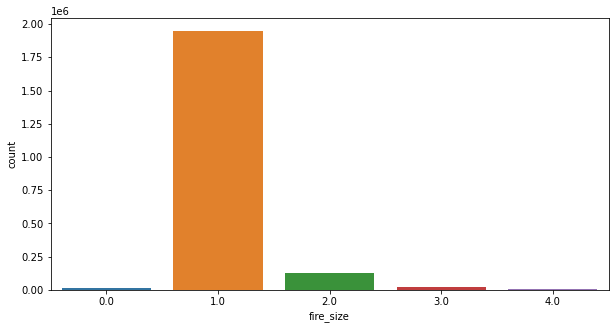

In [7]:
print(df_final["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_final)
plt.show()

In [8]:
test_1=df_final[df_final["fire_size"]==1].sample(12921,replace=False)
test_2=df_final[df_final["fire_size"]==2].sample(12921,replace=False)
test_3=df_final[df_final["fire_size"]==3].sample(12921,replace=True)
test_4=df_final[df_final["fire_size"]==4].sample(12921,replace=True)
test_0=df_final[df_final["fire_size"]==0]

df_final2=pd.concat([test_0, test_1,test_2,test_3,test_4],axis=0)

In [9]:
test_1=df_final[df_final["fire_size"]!=0].sample(12921,replace=False)
test_0=df_final[df_final["fire_size"]==0]

df_final2=pd.concat([test_0, test_1],axis=0)

In [10]:
test_2=df_final[df_final["fire_size"]==2].sample(12921,replace=False)
test_3=df_final[df_final["fire_size"]==3].sample(12921,replace=True)
test_4=df_final[df_final["fire_size"]==4].sample(12921,replace=True)

df_final2=pd.concat([df_final2,test_2,test_3,test_4],axis=0)

2.0    13717
3.0    13033
4.0    12944
0.0    12921
1.0    11990
Name: fire_size, dtype: int64


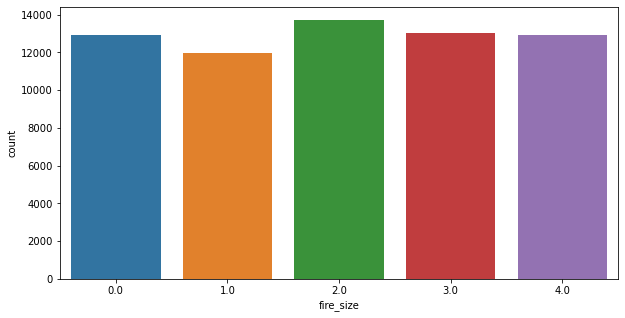

In [11]:
print(df_final2["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_final2)
plt.show()

# Map area with data

In [20]:
clusters = dict()

for index, row in df_final.iterrows():
    key = row['h3_level_4']
    #print(key)
    if key in clusters:
        clusters[key]['count'] += 1
    else:
        clusters[key] = {"count": 1,
                         "geom": h3.h3_to_geo_boundary(key)}

In [1120]:
def create_map(clusters,df):
    # Create the map object
    map = Map(tiles="cartodbpositron", 
          attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>')

    # Convert the clusters dictionary items to polygons and add them to the map
    for cluster in clusters.values():
        points = cluster['geom']
        # points = [p[::-1] for p in points]
        tooltip = "{0} weather stations".format(cluster['count'])
        polygon = folium.vector_layers.Polygon(locations=points, tooltip=tooltip,
                                               fill=True, 
                                               color='#1874CD', 
                                               fill_color='#1874CD', 
                                               fill_opacity=0.4, weight=3, opacity=0.4)
        polygon.add_to(map)

    # Determine the map bounding box
    max_lat = df.lat.max()
    min_lat = df.lat.min()
    max_lon = df.lng.max()
    min_lon = df.lng.min()
    
    # Fit the map to the bounds
    map.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
    
    return map


In [1122]:
map = create_map(clusters,df_fires)
show_map(map, "map_{0}.html".format(4))

# 6. MODELLING

In [742]:
def balance (X_train_scaled, Y, sampler): #sampler=str
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import TomekLinks
    
    print("Before sampling:")
    print("Length X: ", len(X_train_scaled))
    print("Length Y: ", len(Y))
    print("_______________")
    print(pd.DataFrame(Y).value_counts())
    
    
    if sampler=="RandomUnderSampler":
        sa = RandomUnderSampler()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="RandomOverSampler":
        sa = RandomOverSampler()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="SMOTE":
        sa = SMOTE()
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s
    
    elif sampler=="TomekLinks":
        sa = TomekLinks('majority')
        X_s, y_s = sa.fit_sample(X_train_scaled, Y)
        print("_______________")
        print("After sampling:")
        print(pd.DataFrame(y_s).value_counts())
        print(len(y_s))
        
        return X_s, y_s

# 6.1.1. AdaBooster with df_final

In [ ]:
df_final

In [ ]:
df_final_for_model=df_final.drop(["h3_level_4","date","index_fires","cause_id","urban_areas","fire_size"],axis=1)
                                  
                                  

In [913]:
df_Y=df_final[["fire_date","fire_size"]]

In [ ]:
#-- 1 --
#X-Y-SPLIT
Y=df_final_for_model["fire_date"]
X=df_final_for_model.drop(["fire_date"],axis=1)


In [1094]:
X

,avgTemp,avgPerc,avgWind,month,q_avg_temp,y_avg_temp,q_sum_perc,lat,lng
3023,35.44340,0.600000,2.675,07,35.669000,35.669000,5.200000,33.363745,-118.424787
3024,35.91140,0.600000,2.525,08,35.669000,35.669000,5.200000,33.363745,-118.424787
3025,35.65220,4.000000,2.375,09,35.669000,35.669000,5.200000,33.363745,-118.424787
3026,34.74860,27.700000,2.350,10,34.581800,34.581800,29.500000,33.363745,-118.424787
3027,34.33460,0.000000,2.075,11,34.581800,34.581800,29.500000,33.363745,-118.424787
...,...,...,...,...,...,...,...,...,...
231193,35.42495,0.433333,2.600,09,35.691602,35.691602,24.900000,38.935185,-120.487990
231194,34.64870,75.700000,2.250,10,33.263450,33.263450,540.266667,38.935185,-120.487990
231195,32.80325,119.266667,2.400,11,33.263450,33.263450,540.266667,38.935185,-120.487990
231196,32.33840,345.300000,2.925,12,33.263450,33.263450,540.266667,38.935185,-120.487990


In [ ]:
#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)


In [ ]:
#-- 3 --
#SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#transformer on X_train
transformer = StandardScaler().fit(X_train)
#X-train & X-test Scaling on same transformer
X_train_scaled= pd.DataFrame(transformer.transform(X_train), columns = X.columns, index = X_train.index)
X_test_scaled= pd.DataFrame(transformer.transform(X_test), columns = X.columns, index = X_test.index)


In [ ]:
#-- 4 --
#BALANCING
#Calling *balance* function twice

In [ ]:
#X_train_scaled, y_train=balance(X_train_scaled, y_train, "SMOTE")

X_train_scaled_sampled, y_train_sampled=balance(X_train_scaled, y_train, "TomekLinks")

In [ ]:
#-- 5 --
#MODELING
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model= RandomForestClassifier(n_estimators=100,max_depth=6, min_samples_split=200, min_samples_leaf=100)
model=AdaBoostClassifier()
classification=model.fit(X_train_scaled_sampled, y_train_sampled)

y_train_sampled_pred = classification.predict(X_train_scaled_sampled)
y_train_sampled_pred_df = pd.DataFrame(y_train_sampled_pred,index=y_train_sampled.index,columns=["fire"])

y_test_pred = classification.predict(X_test_scaled)
probability = classification.predict_proba(X_test_scaled)
y_test_pred_df = pd.DataFrame(y_test_pred,index=y_test.index,columns=["fire" + "_pred"])

Before sampling:
Length X:  1475854
Length Y:  1475854
_______________
fire_date
1            1466790
0               9064
dtype: int64
_______________
After sampling:
fire_date
1            1465986
0               9064
dtype: int64
1475050
The accuracy of the model in the TRAIN set is:  1.0
The kappa of the model in the TRAIN set is:  0.6151735224022921
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.75      0.52      0.62      9064
           1       1.00      1.00      1.00   1465986

    accuracy                           1.00   1475050
   macro avg       0.87      0.76      0.81   1475050
weighted avg       1.00      1.00      1.00   1475050

The accuracy of the model in the TEST set is:  1.0
The kappa of the model in the TEST set is:  0.6083731446896619
________________________TEST_______________________________________
              precision    recall  f1-score   support

          

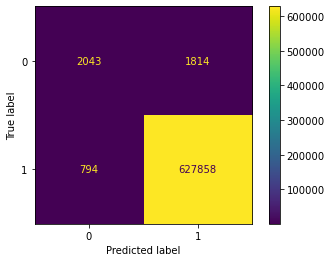

In [1097]:
#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X_train_scaled_sampled, y_train_sampled),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y_train_sampled,y_train_sampled_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y_train_sampled, y_train_sampled_pred))

print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test_scaled,y_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y_test,y_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y_test, y_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y_test, y_test_pred_df))

plot_confusion_matrix(classification, X_test_scaled, y_test)
plt.show()

# 6.1.2. Checking results of AdaBoost

In [916]:
Y=df_final[["fire_date","fire_size"]]
Y

,fire_date,fire_size
3023,0,0.0
3024,0,0.0
3025,0,0.0
3026,0,0.0
3027,0,0.0
...,...,...
231193,1,1.0
231194,1,1.0
231195,0,0.0
231196,0,0.0


In [943]:
evaluation_pred=y_test_pred_df
evaluation_pred["actual_values"]=y_test
index=list(evaluation_pred.index)
#evaluation_pred.drop(["actueal_values"],axis=1, inplace=True)

In [945]:
Y_pred=Y_pred[Y_pred.index.isin(index)]

In [948]:
eval_pred=Y_pred.join(evaluation_pred)

In [951]:
wrong_pred=eval_pred[eval_pred["fire_pred"]!=eval_pred["actual_values"]]

In [952]:
wrong_pred

,fire_date,fire_size,fire_pred,actual_values
3023,0,0.0,1,0
3035,0,0.0,1,0
3047,0,0.0,1,0
3062,0,0.0,1,0
3083,0,0.0,1,0
...,...,...,...,...
231026,1,1.0,0,1
231027,0,0.0,1,0
231126,1,1.0,0,1
231158,1,1.0,0,1


In [1089]:
size=df_final[df_final.index.isin(index)]
size=size["cause_id"]
size

38691     0.0
38692     0.0
38693     0.0
38694     0.0
38695     0.0
         ... 
189545    2.0
189546    2.0
189547    2.0
189548    2.0
189549    2.0
Name: cause_id, Length: 118023, dtype: float64

In [1090]:
false_negative=wrong_pred[wrong_pred["fire_pred"]==0]

In [1092]:
false_negative=pd.concat([false_negative,size],axis=1)
false_negative

,fire_date,fire_size,fire_pred,actual_values,cause_id
3163,1.0,1.0,0.0,1.0,NaN
3442,1.0,2.0,0.0,1.0,NaN
4243,1.0,1.0,0.0,1.0,NaN
4288,1.0,1.0,0.0,1.0,NaN
5719,1.0,1.0,0.0,1.0,NaN
...,...,...,...,...,...
230237,1.0,1.0,0.0,1.0,NaN
230736,1.0,1.0,0.0,1.0,NaN
231026,1.0,1.0,0.0,1.0,NaN
231126,1.0,1.0,0.0,1.0,NaN


1.0    860
2.0     48
3.0      3
4.0      2
Name: fire_size, dtype: int64


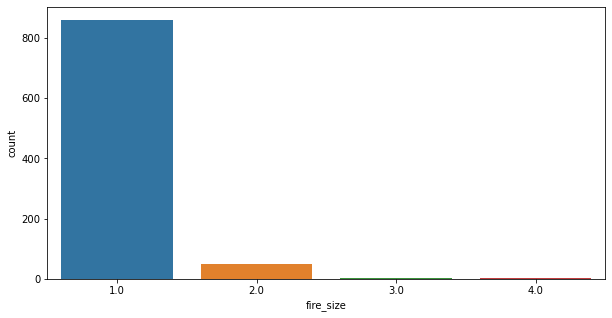

In [955]:
print(false_negative["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=false_negative)
plt.show()

In [ ]:
for size_class in size_classes:
    print("------ FIRE SIZE CLASS: ",size_class," ------")
    plt.figure(figsize=(12,8))
    sns.countplot(x="FIRE_YEAR", data=df_fires[df_fires["FIRE_SIZE_CLASS"]==size_class])
    plt.show()

# 6.2.1. AdaBooster with df_final2

In [12]:
df_final2.shape

(64605, 17)

In [14]:
df_final2.drop(["index_fires"],axis=1, inplace=True)

In [1296]:
df_final2_temp=df_final2[['fire_date','avgTemp',
       'avgPerc', 'avgWind', 'month', 'q_avg_temp',
       'y_avg_temp', 'q_sum_perc', 'urban_areas', 'lat', 'lng']]

In [19]:
#-- 1 --
#X-Y-SPLIT
Y=df_final2["fire_date"]
X=df_final2.drop(["fire_date","date"],axis=1)

In [16]:
#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)


In [17]:
#-- 3 --
#SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#transformer on X_train
transformer = StandardScaler().fit(X_train)
#X-train & X-test Scaling on same transformer
X_train_scaled= pd.DataFrame(transformer.transform(X_train), columns = X.columns, index = X_train.index)
X_test_scaled= pd.DataFrame(transformer.transform(X_test), columns = X.columns, index = X_test.index)


ValueError: could not convert string to float: '1995-11-01'

In [1300]:
X_train_scaled

,avgTemp,avgPerc,avgWind,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng
927276,0.910925,-0.324859,-1.377111,0.040701,1.051409,1.051409,0.502007,0.977326,-0.964887,0.999291
2475559,-0.357185,-0.355510,-0.847255,1.323948,-0.551488,-0.551488,-0.295098,0.977326,0.805309,-0.599512
1714400,0.527163,-0.355510,1.051393,0.468450,0.497669,0.497669,-0.322756,-1.023200,0.446629,-0.358693
450037,-0.748778,0.384602,-0.052472,1.323948,-0.873729,-0.873729,-0.310944,-1.023200,0.825274,-1.194297
751385,0.706643,-0.355510,-0.350516,0.468450,0.786816,0.786816,-0.130959,0.977326,0.909916,-0.754411
...,...,...,...,...,...,...,...,...,...,...
2327085,-2.562343,0.784561,-1.774502,-0.814798,-2.710700,-2.710700,-0.409968,-1.023200,0.524968,0.083507
1880462,0.525532,-0.245241,-0.913487,0.040701,0.562304,0.562304,-0.014400,-1.023200,1.518371,-1.694703
1622389,-1.578955,0.562154,0.477383,-2.525795,-1.721619,-1.721619,-0.340696,0.977326,-0.771268,0.489004
660506,0.447213,-0.264865,1.404630,0.468450,0.719290,0.719290,-0.364701,-1.023200,0.111215,-0.708899


In [1301]:
y_train.value_counts()

1    36261
0     8962
Name: fire_date, dtype: int64

In [1302]:
#-- 5 --
#MODELING
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model= RandomForestClassifier(n_estimators=100,max_depth=6, min_samples_split=200, min_samples_leaf=100)
model=AdaBoostClassifier()
classification=model.fit(X_train_scaled, y_train)

y_train_pred = classification.predict(X_train_scaled)
y_train_pred_df = pd.DataFrame(y_train_pred,index=y_train.index,columns=["fire"])

y_test_pred = classification.predict(X_test_scaled)
probability = classification.predict_proba(X_test_scaled)
y_test_pred_df = pd.DataFrame(y_test_pred,index=y_test.index,columns=["fire" + "_pred"])

The accuracy of the model in the TRAIN set is:  0.97
The kappa of the model in the TRAIN set is:  0.8989426067854925
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8962
           1       0.97      0.99      0.98     36261

    accuracy                           0.97     45223
   macro avg       0.96      0.94      0.95     45223
weighted avg       0.97      0.97      0.97     45223

The accuracy of the model in the TEST set is:  0.97
The kappa of the model in the TEST set is:  0.8943669156275789
________________________TEST_______________________________________
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3959
           1       0.97      0.99      0.98     15423

    accuracy                           0.97     19382
   macro avg       0.96      0.94      0.95     19382
weighted avg       0.97      0.9

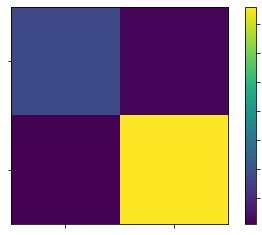

In [1303]:
#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X_train_scaled, y_train),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y_train,y_train_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y_train, y_train_pred))

print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test_scaled,y_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y_test,y_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y_test, y_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y_test, y_test_pred_df))

plot_confusion_matrix(classification, X_test_scaled, y_test)
plt.show()

In [1328]:
import joblib

#save the model
joblib.dump(classification, 'model_Ada_0.89.pkl')  

['model_Ada_0.89.pkl']

In [1317]:
def check_results(y_test_pred_df, df_final2):
    evaluation_pred=y_test_pred_df
    index=list(evaluation_pred.index)

    Y_pred=df_final2[["fire_size"]]
    Y_pred=Y_pred[Y_pred.index.isin(index)]

    eval_pred=Y_pred.join(evaluation_pred)

    wrong_pred=eval_pred[eval_pred["fire_pred"]!=eval_pred["actual_values"]]
    #size=df_final2[df_final2.index.isin(index)]
    #size=size["cause_id"]

    false_negative=wrong_pred[wrong_pred["fire_pred"]==0]
    #false_negative=pd.concat([false_negative,size],axis=1)
    
    return wrong_pred, false_negative

In [1319]:
wrong_pred, false_negative=check_results(y_test_pred_df,df_final2)

In [1313]:
# Check results
# saving pred
evaluation_pred=y_test_pred_df
index=list(evaluation_pred.index)

Y_pred=df_final2[["fire_size"]]
Y_pred=Y_pred[Y_pred.index.isin(index)]

eval_pred=Y_pred.join(evaluation_pred)

wrong_pred=eval_pred[eval_pred["fire_pred"]!=eval_pred["actual_values"]]
#size=df_final2[df_final2.index.isin(index)]
#size=size["cause_id"]

false_negative=wrong_pred[wrong_pred["fire_pred"]==0]
#false_negative=pd.concat([false_negative,size],axis=1)

In [1314]:
wrong_pred

,fire_size,fire_pred,actual_values
38872,0.0,1,0
39866,0.0,1,0
40069,0.0,1,0
40087,0.0,1,0
40088,0.0,1,0
...,...,...,...
2841477,0.0,1,0
2841655,0.0,1,0
2845588,0.0,1,0
2845846,2.0,0,1


In [1315]:
false_negative

,fire_size,fire_pred,actual_values
58956,3.0,0,1
73169,1.0,0,1
83450,3.0,0,1
83450,3.0,0,1
102461,1.0,0,1
...,...,...,...
2733263,1.0,0,1
2816725,3.0,0,1
2822209,1.0,0,1
2845846,2.0,0,1


3.0    93
4.0    89
1.0    82
2.0    55
Name: fire_size, dtype: int64


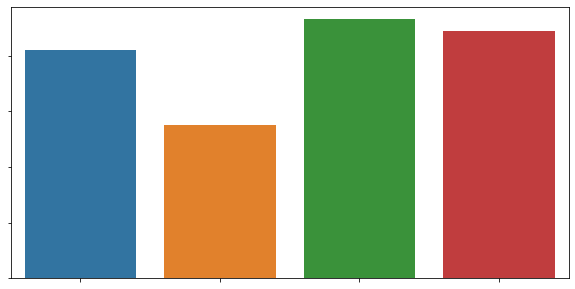

In [1316]:
print(false_negative["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=false_negative)
plt.show()

In [1320]:

#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)


In [2]:
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score

ftwo_scorer = make_scorer(cohen_kappa_score)

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid={
        'n_estimators': [50,100, 150],
        "learning_rate" : [0.001,0.01,0.2,0.5]
    },
     cv=5, scoring=ftwo_scorer, verbose=0,
n_jobs=1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

NameError: name 'AdaBoostClassifier' is not defined

In [ ]:
model_4 = AdaBoostClassifier(n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"],
random_state=False, verbose=False).fit(X_train,y_train)
predictions_4 = rfr.predict(X_test)

# 6.3.1. Hambacher Forest

Before sampling:
Length X:  1475854
Length Y:  1475854
_______________
fire_date
1            1466790
0               9064
dtype: int64
_______________
After sampling:
fire_date
1            1465986
0               9064
dtype: int64
1475050
The accuracy of the model in the TRAIN set is:  1.0
The kappa of the model in the TRAIN set is:  0.42640580912005555
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           0       0.87      0.28      0.43      9064
           1       1.00      1.00      1.00   1465986

    accuracy                           1.00   1475050
   macro avg       0.94      0.64      0.71   1475050
weighted avg       0.99      1.00      0.99   1475050

The accuracy of the model in the TEST set is:  1.0
The kappa of the model in the TEST set is:  0.4152583616219784
________________________TEST_______________________________________
              precision    recall  f1-score   support

         

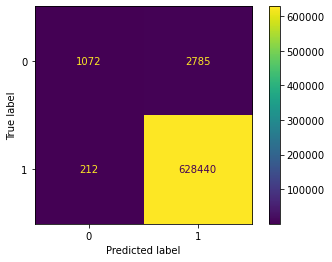

In [1096]:

#-- 1 --
#X-Y-SPLIT
Y=df_final["fire_date"]
X=df_final.drop(["fire_date","h3_level_4","date","cause_id","index_fires","urban_areas","fire_size"],axis=1)

#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#-- 3 --
#SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#transformer on X_train
transformer = StandardScaler().fit(X_train)
#X-train & X-test Scaling on same transformer
X_train_scaled= pd.DataFrame(transformer.transform(X_train), columns = X.columns, index = X_train.index)
X_test_scaled= pd.DataFrame(transformer.transform(X_test), columns = X.columns, index = X_test.index)

#-- 4 --
#BALANCING
#Calling *balance* function twice
#X_train_scaled, y_train=balance(X_train_scaled, y_train, "SMOTE")

#X_train_scaled, y_train=balance(X_train_scaled, y_train, "TomekLinks")

#-- 5 --
#MODELING
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model= RandomForestClassifier(n_estimators=100,max_depth=6, min_samples_split=200, min_samples_leaf=100)
#model=AdaBoostClassifier()
classification=model.fit(X_train_scaled, y_train)

y_train_sampled_pred = classification.predict(X_train_scaled)
y_train_sampled_pred_df = pd.DataFrame(y_train_sampled_pred,index=y_train.index,columns=["fire"])

y_test_pred = classification.predict(X_test_scaled)
probability = classification.predict_proba(X_test_scaled)
y_test_pred_df = pd.DataFrame(y_test_pred,index=y_test.index,columns=["fire" + "_pred"])


#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X_train_scaled, y_train),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y_train,y_train_sampled_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y_train, y_train_sampled_pred))

print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test_scaled,y_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y_test,y_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y_test, y_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y_test, y_test_pred_df))

plot_confusion_matrix(classification, X_test_scaled, y_test)
plt.show()

In [1326]:
from sklearn.metrics import make_scorer

ftwo_scorer = make_scorer(cohen_kappa_score)

In [1327]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        
        'max_depth': list(range(3,8)),
        'n_estimators': [250, 500],
        "min_sample_split":[500,1000]
    },
     cv=5, scoring=ftwo_scorer, verbose=0,
n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6)}

In [ ]:
model_4 = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
random_state=False, verbose=False).fit(X_train,y_train)
predictions_4 = rfr.predict(X_test)

In [770]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

def Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestRegressor()):    # RandomForestClassifier()  or RandomForestRegressor() for Modell
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    #scaling
    scaler_x = scaler.fit(X)
    X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns, index=X.index)
    #upsampling
    X, y = balance (X_scaled, Y, "TomekLinks")
    Xs_scaled, ys = balance (X, y, "SMOTE")
     

    model.fit(Xs_scaled, ys)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Before sampling:
Length X:  139199
Length Y:  139199
_______________
fire_date
1            126278
0             12921
dtype: int64
_______________
After sampling:
fire_date
1            125122
0             12921
dtype: int64
138043
Before sampling:
Length X:  138043
Length Y:  138043
_______________
fire_date
1            125122
0             12921
dtype: int64
_______________
After sampling:
fire_date
0            125122
1            125122
dtype: int64
250244
Feature: 0, Score: 0.08372
Feature: 1, Score: 0.16277
Feature: 2, Score: 0.03662
Feature: 3, Score: 0.07428
Feature: 4, Score: 0.11269
Feature: 5, Score: 0.15866
Feature: 6, Score: 0.01272
Feature: 7, Score: 0.10501
Feature: 8, Score: 0.13974
Feature: 9, Score: 0.11380


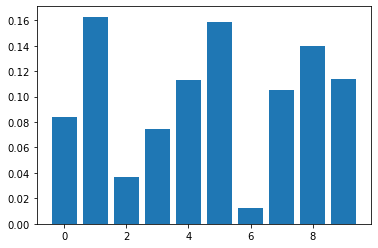

In [787]:
Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestClassifier())

In [788]:
X

,avgPerc,avgTemp,avgWind,month,q_avg_temp,q_sum_perc,urban_areas,lat,lng,y_avg_temp
3023,0.600000,35.44340,2.675,07,35.669000,5.200000,0,33.363745,-118.424787,35.669000
3024,0.600000,35.91140,2.525,08,35.669000,5.200000,0,33.363745,-118.424787,35.669000
3025,4.000000,35.65220,2.375,09,35.669000,5.200000,0,33.363745,-118.424787,35.669000
3026,27.700000,34.74860,2.350,10,34.581800,29.500000,0,33.363745,-118.424787,34.581800
3027,0.000000,34.33460,2.075,11,34.581800,29.500000,0,33.363745,-118.424787,34.581800
...,...,...,...,...,...,...,...,...,...,...
231193,0.433333,35.42495,2.600,09,35.691602,24.900000,0,38.935185,-120.487990,35.691602
231194,75.700000,34.64870,2.250,10,33.263450,540.266667,0,38.935185,-120.487990,33.263450
231195,119.266667,32.80325,2.400,11,33.263450,540.266667,0,38.935185,-120.487990,33.263450
231196,345.300000,32.33840,2.925,12,33.263450,540.266667,0,38.935185,-120.487990,33.263450


In [753]:
no=[]
yes=[]

for i in range(len(probability)):
    no.append(probability[i][0])
    yes.append(probability[i][1])
    

In [754]:
y_test_pred_df["no"]=[p for p in no]
y_test_pred_df["yes"]=[p for p in yes]
y_test_pred_df

,fire_pred,no,yes
97801,1,1.251979e-05,0.999987
73457,1,6.818770e-02,0.931812
226050,1,9.265047e-10,1.000000
77907,1,8.323965e-02,0.916760
176222,1,1.035316e-01,0.896468
...,...,...,...
162174,0,5.304845e-01,0.469515
12560,1,2.386152e-02,0.976138
201999,1,2.628702e-01,0.737130
95962,1,5.036670e-04,0.999496


# Evaluating AdaBoostModel with Threshold

In [759]:
# function to change the threshold in predictions
def adjust_threshold(test_set, predictions, probability, threshold = 0.5):
    from sklearn import model_selection, metrics
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    print('========================================================================')
    print('Before threshold adjustment:')
    check = confusion_matrix(test_set, predictions)
    print(check)
    
    #plot
    predtst=probability[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_set, predtst)
    dfplot=pd.DataFrame({'Threshold':thresholds,
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
    ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
    ax.plot([0.5,0.5],[0,0.5]) #mark example thresh.
    ax.set_xbound(0.02,1); ax.set_ybound(0,1) #zoom in
    plt.show()
    
    #changing classfication to new threshold
    probability = pd.DataFrame(probability)
    pred=predictions
    #predictions = pd.DataFrame(predictions)
    for i in range(len(probability[1])):
        if probability[1][i] >= threshold:
            pred[i] = 1
            
    check = confusion_matrix(test_set, pred)
    print('========================================================================')
    print('\nAfter threshold adjustment with threshold = >>{}<<'.format(round(threshold,4)))
    print(check)
    
    #predtst=probability[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_set, predtst)
    dfplot=pd.DataFrame({'Threshold':thresholds,
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
    ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
    ax.plot([threshold,threshold],[0,0.5]) #mark example thresh.
    ax.set_xbound(0.02,1); ax.set_ybound(0,1) #zoom in
    plt.show()
    print('\n========================================================================')


Before threshold adjustment:
[[    0  3849]
 [    0 37911]]


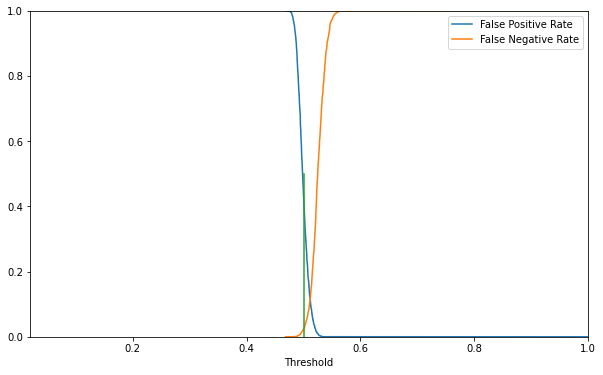


After threshold adjustment with threshold = >>0.5<<
[[    0  3849]
 [    0 37911]]


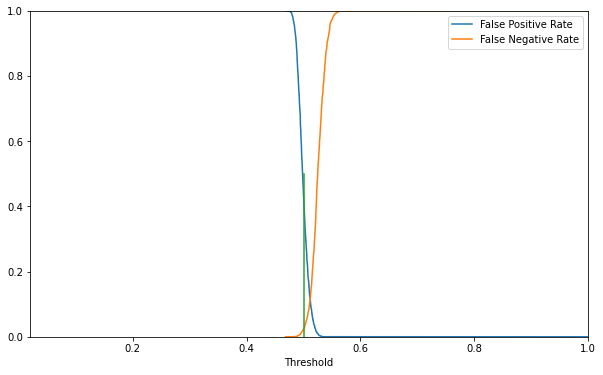

In [778]:
adjust_threshold(y_test,y_test_pred, probability, threshold = 0.5)

In [757]:
y_test_pred_df[y_test_pred_df["fire_pred"]==1]

,fire_pred,no,yes
97801,1,1.251979e-05,0.999987
73457,1,6.818770e-02,0.931812
226050,1,9.265047e-10,1.000000
77907,1,8.323965e-02,0.916760
176222,1,1.035316e-01,0.896468
...,...,...,...
202104,1,2.696913e-01,0.730309
12560,1,2.386152e-02,0.976138
201999,1,2.628702e-01,0.737130
95962,1,5.036670e-04,0.999496


In [758]:
y_test_pred_df[y_test_pred_df["no"]>0.4]

,fire_pred,no,yes
161787,0,0.602357,0.397643
113248,0,0.898280,0.101720
196754,0,0.548581,0.451419
203287,0,0.767758,0.232242
91700,0,0.818379,0.181621
...,...,...,...
159596,1,0.406216,0.593784
123750,1,0.446738,0.553262
187110,1,0.413549,0.586451
211491,0,0.954884,0.045116
